# Проект "Планирование рекламной кампании для интернет-магазина компьютерных игр" #

## Описание проекта ##

Для заказчика - менеджмента интернет-магазина **«Стримчик»** (магазин продает компьютерные игры) - необходимо провести анализ предоставленных исторических данных и выявить закономерности, определяющие успешность игр.
Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Данные предоставлены до 2016 года (рекламная компания планируется на 2017 год).


## Описание данных ##

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Путь к файлу: */datasets/games.csv*

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB* (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

16715 строк, 11 столбцов

*ESRB (Entertainment Software Rating Board) — ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Предобработка данных ##

In [1]:
# Проанализируем файл games.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st


try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
except:
    data = pd.read_csv('sample_data/games.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Названия столбцов

In [ ]:
# Переведём названия столбцов в нижний регистр (во избежание ошибок и опечаток при адресации)

data.columns = data.columns.str.lower()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В датафрейме есть пустые значения в столбцах:

- name (2 пропуска)
- year_of_release (269 пропусков)
- genre (2 пропуска)
- critic_score (8578 пропусков)
- user_score (6701 пропуск)
- rating (6766 пропусков)

In [ ]:
data.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Пропуски в названиях игр

In [ ]:
# В столбце name - 2 пустых значения (в тех же строках - пустой жанр)

display(data[data['name'].isna() & data['genre'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [ ]:
# Можно удалить 2 строки, поскольку дозаполнить данные вряд ли удастся
# По всей видимости, в файл были некорректно перенесены архивные данные за 1993 год

data = data[data['name'].notna()].reset_index(drop=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итого: 16713 строк

Их них пустых значений:
- year_of_release (269 пропусков)
- critic_score (8576 пропусков)
- user_score (6699 пропусков)
- rating (6764 пропуска)

### Год выпуска

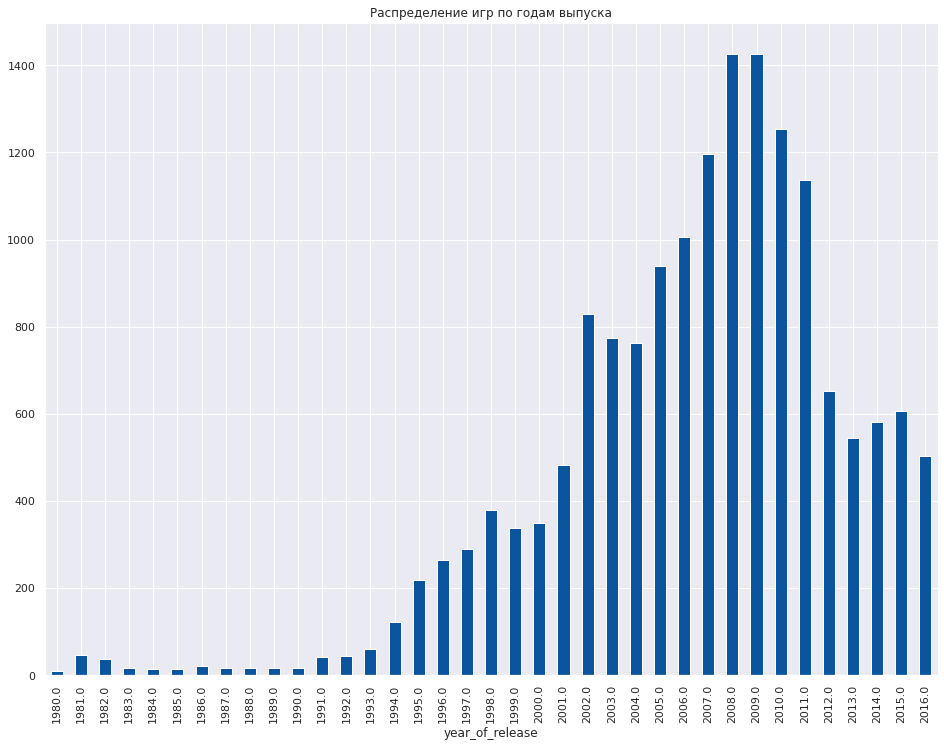

In [ ]:
# Посмотрим на распределение игр по годам выпуска (там, где они заполнены)

sns.set(palette='Blues_r')

(
pd.pivot_table(data, index='year_of_release', values='name', aggfunc=len)
    .plot(kind='bar',
          grid=True,
          legend=False,
          figsize=(16, 12),
          title='Распределение игр по годам выпуска')
);

Самый ранний релиз в файле - 1980 года, самый поздний - 2016.

In [ ]:
# В столбце Год выпуска есть пропуски

display(data[data['year_of_release'].isna()])

# В некоторых строках значения года есть в столбце с названием (последние 4 знака) - попробуем это использовать
# для заполнения года выпуска игры
# Возьмем 4 последних знака из наименования, сохраним их в новом столбце year
# и проверим, что это числа
data['year'] = data[data['year_of_release'].isna()]['name'].str[-4:]
# Если это не числа, то присваиваем NaN
data['year'] = data['year'].where(data['year'].str.isdigit() == True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [ ]:
display(data[data['year_of_release'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2004
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2004
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,NaN
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,2006
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+,2008
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,NaN
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,NaN
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN


In [ ]:
# Выведем строки, где удалось получить значение Год
display(data[data['year'].notna()])

# 15 строк можно заполнить полученным значением
data['year_of_release'] = data['year_of_release'].fillna(data['year'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2004
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2004
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,2006
1649,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E,2003
3485,Madden NFL 2002,XB,NaN,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E,2002
4774,NFL GameDay 2003,PS2,NaN,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E,2003
5155,NBA Live 2003,XB,NaN,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E,2003
5654,All-Star Baseball 2005,PS2,NaN,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E,2005
5888,NBA Live 2003,GC,NaN,Sports,0.23,0.06,0.00,0.01,82.0,8.2,E,2003
8917,All-Star Baseball 2005,XB,NaN,Sports,0.11,0.03,0.00,0.01,75.0,8.8,E,2005


In [ ]:
display(data[data['year_of_release'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,NaN
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E,NaN
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16346,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,NaN
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,NaN
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN


In [ ]:
# Оставшиеся 254 пустых значения (1.5% от общего числа записей) придется удалить, т.к., не имея дополнительной информации,
# установить год выпуска сложно
data = data[data['year_of_release'].notna()].reset_index(drop=True)

# Приведем значения столбца year_of_release к целочисленному типу
data['year_of_release'] = data['year_of_release'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16459 entries, 0 to 16458
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16459 non-null  object 
 1   platform         16459 non-null  object 
 2   year_of_release  16459 non-null  int64  
 3   genre            16459 non-null  object 
 4   na_sales         16459 non-null  float64
 5   eu_sales         16459 non-null  float64
 6   jp_sales         16459 non-null  float64
 7   other_sales      16459 non-null  float64
 8   critic_score     7994 non-null   float64
 9   user_score       9850 non-null   object 
 10  rating           9778 non-null   object 
 11  year             15 non-null     object 
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


Итого: 16459 строк

Их них пустых значений:
- critic_score (8465 пропусков)
- user_score (6609 пропусков)
- rating (6681 пропуск)

### Оценка критиков

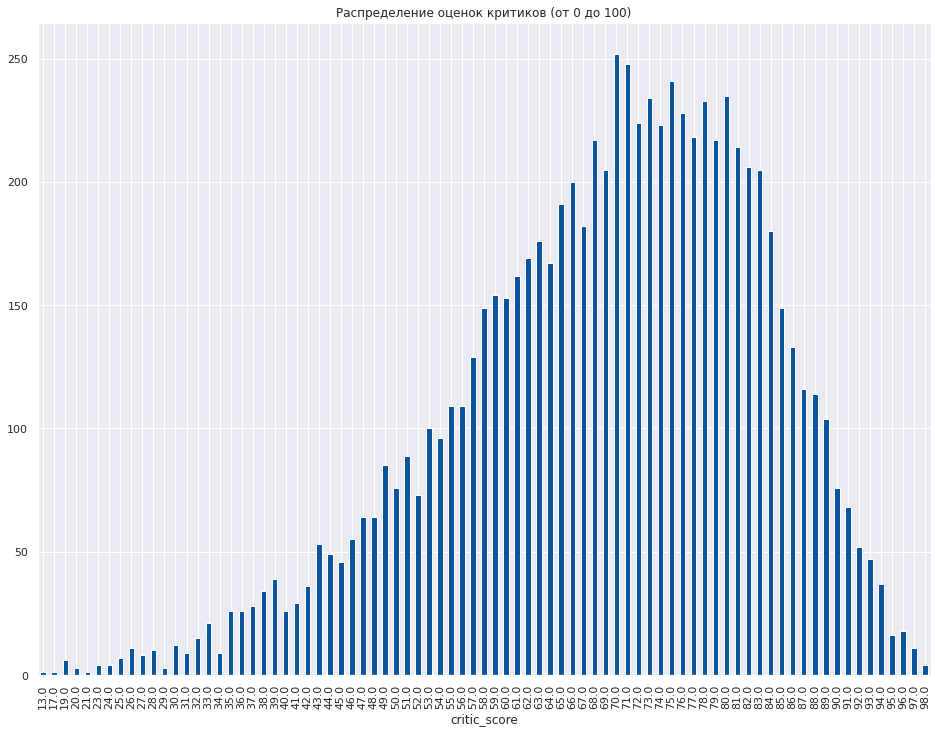

In [ ]:
# Посмотрим на значения рейтингов
# Оценка критиков: целые числа - от 0 до 100
(
pd.pivot_table(data, index='critic_score', values='name', aggfunc=len)
    .plot(kind='bar',
          grid=True,
          legend=False,
          figsize=(16, 12),
          title='Распределение оценок критиков (от 0 до 100)')
);

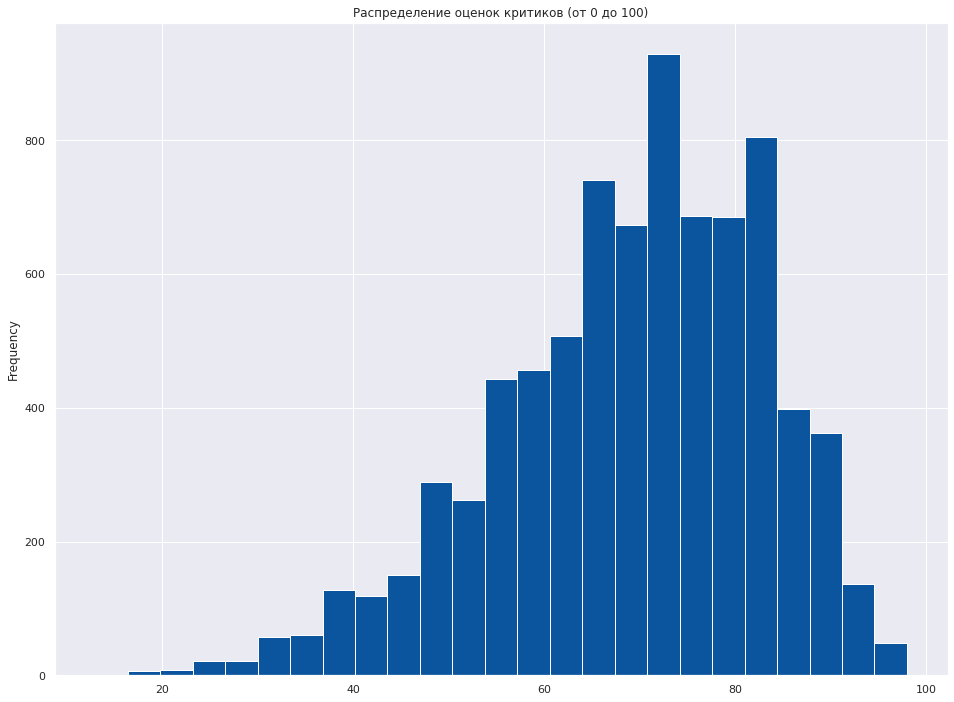

In [ ]:
# Посмотрим также на частотную диаграмму распределения оценок критиков
# Мы видим моду распределения в районе значения 70 баллов
(
data['critic_score']
    .plot(kind='hist',
          grid=True,
          legend=False,
          figsize=(16, 12),
          bins=25,
          title='Распределение оценок критиков (от 0 до 100)')
);

In [ ]:
# Рассмотрим пропуски в столбце critic_score
display(data[data['critic_score'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16454,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN
16455,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,NaN
16456,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN
16457,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN


In [ ]:
# Заполним пустые значения рейтинга критиков нулями и приведем значения к целым числам
data['critic_score'] = data['critic_score'].fillna(0).astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16459 entries, 0 to 16458
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16459 non-null  object 
 1   platform         16459 non-null  object 
 2   year_of_release  16459 non-null  int64  
 3   genre            16459 non-null  object 
 4   na_sales         16459 non-null  float64
 5   eu_sales         16459 non-null  float64
 6   jp_sales         16459 non-null  float64
 7   other_sales      16459 non-null  float64
 8   critic_score     16459 non-null  int64  
 9   user_score       9850 non-null   object 
 10  rating           9778 non-null   object 
 11  year             15 non-null     object 
dtypes: float64(4), int64(2), object(6)
memory usage: 1.5+ MB


### Оценка пользователей

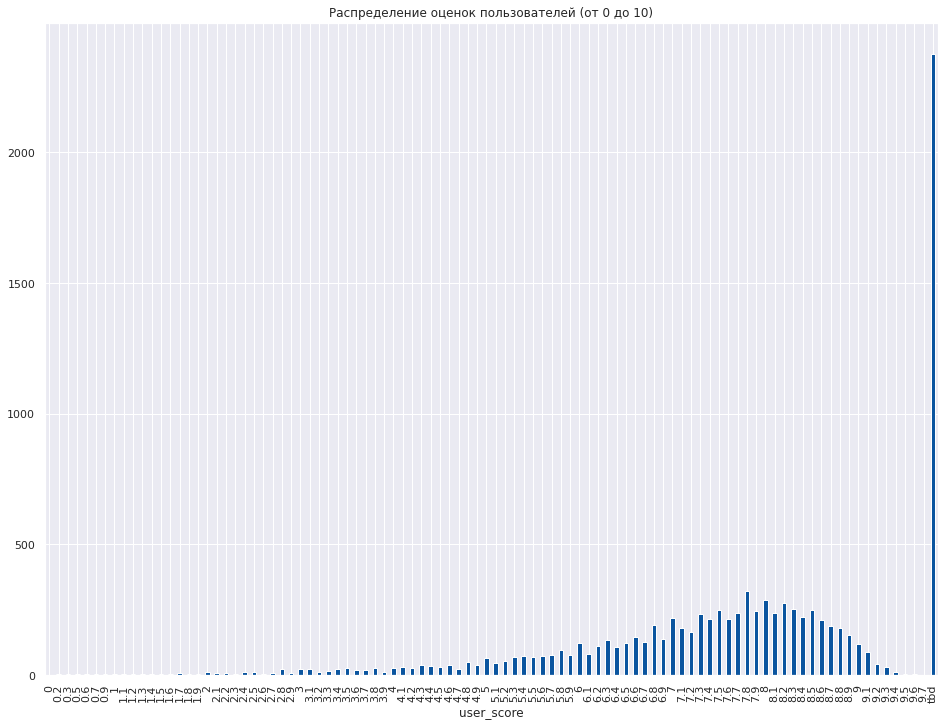

In [ ]:
# Оценка пользователей: вещественные числа (в данном случае строки) от 0 до 10,
# самое популярное значение - строка tbd (to be determined)
(
pd.pivot_table(data, index='user_score', values='name', aggfunc=len)
    .plot(kind='bar',
          grid=True,
          legend=False,
          figsize=(16, 12),
          title='Распределение оценок пользователей (от 0 до 10)')
);

Как мы видим, среди оценок пользователей преобладает "невыясненное" значение tbd - to be determined. По всей видимости, достаточное количество оценок еще не накоплено.

In [ ]:
# Некоторые игры не оценивались с 1997 года, но хуже всего обстоят дела в 2009 году
display(data.query('user_score == "tbd"').groupby('year_of_release')['year_of_release'].count())

display(data.query('user_score == "0"').groupby('year_of_release')['year_of_release'].count())

year_of_release
1997      1
1999      8
2000     43
2001     82
2002    192
2003     96
2004    107
2005    121
2006    124
2007    192
2008    327
2009    405
2010    331
2011    217
2012     24
2013     15
2014     21
2015     38
2016     34
Name: year_of_release, dtype: int64

year_of_release
2008    1
Name: year_of_release, dtype: int64

In [ ]:
# Исправим tbd на 0, и неопределенные значения тоже заполним нулем, чтобы тип оценок стал вещественным
# (в исходном массиве это строки)

data['user_score'] = data['user_score'].fillna(0)
data['user_score'] = data['user_score'].where(data['user_score'] != "tbd", 0)
data['user_score'] = data['user_score'].astype(float)

# Итого - 8988 нулевых значений в итоговом массиве

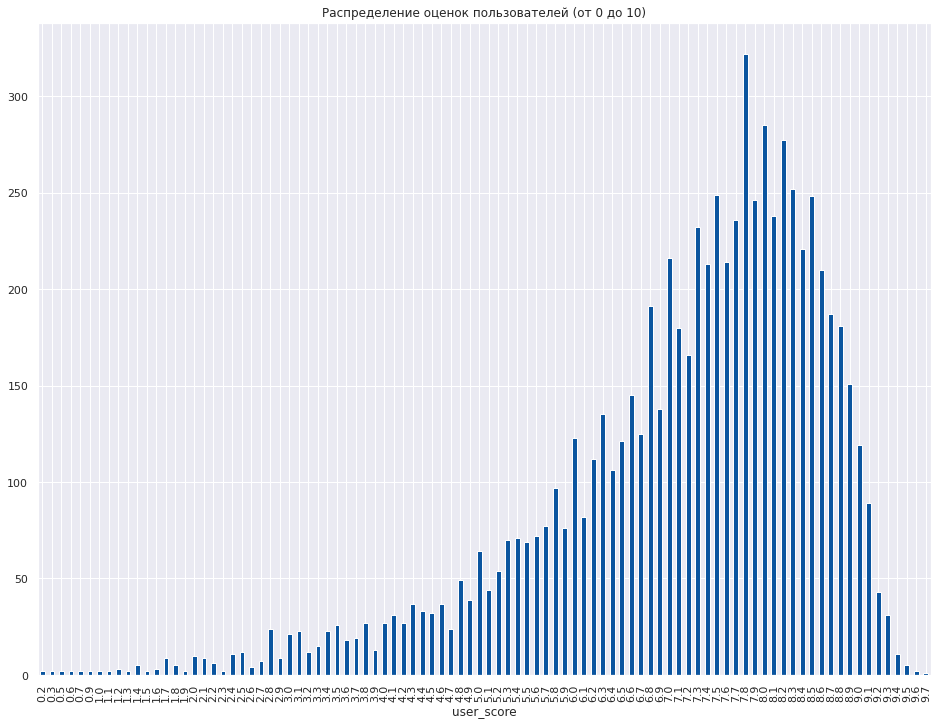

In [ ]:
# Построим диаграмму обновленного рейтинга пользователей (кроме нулевых значений)
(
pd.pivot_table(data.query('user_score > 0'), index='user_score', values='name', aggfunc=len)
    .plot(kind='bar',
          grid=True,
          legend=False,
          figsize=(16, 12),
          title='Распределение оценок пользователей (от 0 до 10)')
);

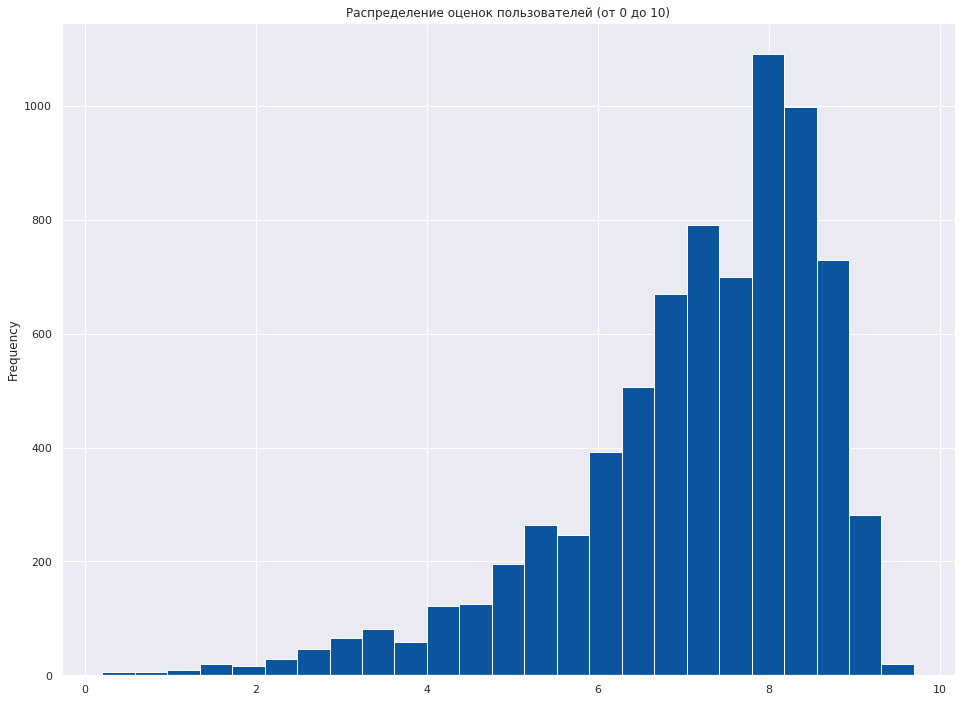

In [ ]:
# Посмотрим также на частотную диаграмму распределения оценок пользователей (кроме нулевых значений)
# Мы видим моду распределения в районе оценки 8 баллов
(
data.query('user_score > 0')['user_score']
    .plot(kind='hist',
          grid=True,
          legend=False,
          figsize=(16, 12),
          bins=25,
          title='Распределение оценок пользователей (от 0 до 10)')
);

### Рейтинг ESRB

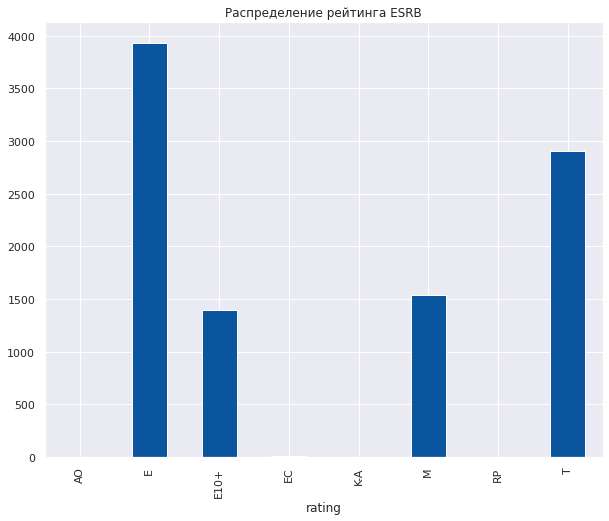

In [ ]:
# Посмотрим, как заполнены значения рейтинга ESRB
# Построим диаграмму данных по рейтингу
(
pd.pivot_table(data, index='rating', values='name', aggfunc=len)
    .plot(kind='bar',
          grid=True,
          legend=False,
          figsize=(10, 8),
          title='Распределение рейтинга ESRB')
);

In [ ]:
display(pd.pivot_table(data, index='rating', values='name', aggfunc=len))

,name
rating,
AO,1
E,3930
E10+,1394
EC,8
K-A,3
M,1536
RP,1
T,2905


**Рейтинги ESRB (справочно):**
- **EC** («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «Everyone».
- **E** («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально **K-A** ("Kids to Adults")
- **E10+** («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.
- **T** («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
- **M** («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.
- **AO** («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. Большинство таких игр предназначено для персональных компьютеров под управлением Microsoft Windows и Apple Macintosh. Рейтинг «Только для взрослых» является предметом многочисленных дискуссий, так как накладывает серьёзные ограничения на продажи игры.
- **RP** («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

In [ ]:
# Как мы видим из описания категорий, рейтинг K-A устарел и больше не используется
# 3 записи содержат это значение
# Заменим его на более актуальное «E» («Everyone»)

display(data[data['rating'] == 'K-A'])

data['rating'] = data['rating'].where(data['rating'] != 'K-A', 'E')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
653,Theme Hospital,PC,1997,Strategy,2.30,0.10,0.00,0.00,0,9.0,K-A,NaN
895,PaRappa The Rapper,PS,1996,Misc,0.26,0.16,1.46,0.03,92,7.4,K-A,NaN
16425,Worms 2,PC,1997,Strategy,0.00,0.01,0.00,0.00,0,8.1,K-A,NaN


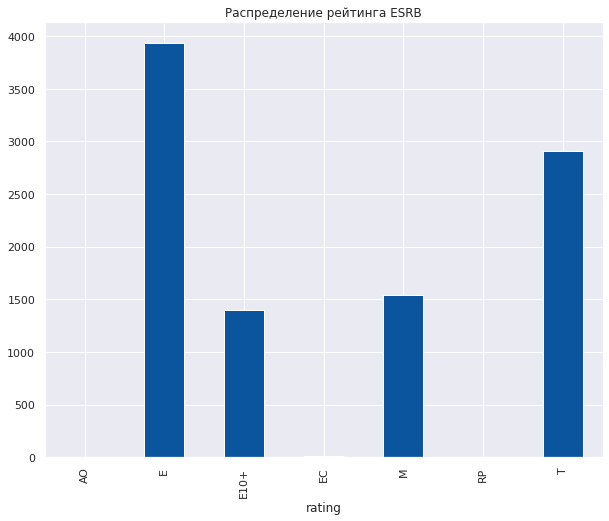

In [ ]:
(
pd.pivot_table(data, index='rating', values='name', aggfunc=len)
    .plot(kind='bar',
          grid=True,
          legend=False,
          figsize=(10, 8),
          title='Распределение рейтинга ESRB')
);

In [ ]:
display(pd.pivot_table(data, index='rating', values='name', aggfunc=len))

,name
rating,
AO,1
E,3933
E10+,1394
EC,8
M,1536
RP,1
T,2905


In [ ]:
# Организация, которая занимается присвоением рейтинга, появилась только в 1994 году,
# т.ч.более старые игры могли не попасть в её поле зрения (361 "старая" запись)

display(data[data['rating'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,0.0,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,0.0,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16454,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,NaN,NaN
16455,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0.0,NaN,NaN
16456,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,NaN,NaN
16457,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,0.0,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16459 entries, 0 to 16458
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16459 non-null  object 
 1   platform         16459 non-null  object 
 2   year_of_release  16459 non-null  int64  
 3   genre            16459 non-null  object 
 4   na_sales         16459 non-null  float64
 5   eu_sales         16459 non-null  float64
 6   jp_sales         16459 non-null  float64
 7   other_sales      16459 non-null  float64
 8   critic_score     16459 non-null  int64  
 9   user_score       16459 non-null  float64
 10  rating           9778 non-null   object 
 11  year             15 non-null     object 
dtypes: float64(5), int64(2), object(5)
memory usage: 1.5+ MB


In [ ]:
# Проверим, какие рейтинги присваивают играм разных жанров

genre = list(set(data['genre']))
genre.sort()
display(genre)

# Всего в датафрейме 12 жанров

['Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy']

In [ ]:
# Создадим сводную таблицу для всех жанров (с итогами по рейтингам)
pt_genre = pd.pivot_table(data, index='genre', columns='rating', values='name', aggfunc=len, fill_value=0)

# Переопределим индекс, чтобы жанр был в отдельном столбце
pt_genre.reset_index(inplace=True)

display(pt_genre)

rating,genre,AO,E,E10+,EC,M,RP,T
0,Action,1,410,468,1,596,0,670
1,Adventure,0,159,67,2,98,0,114
2,Fighting,0,8,19,0,48,0,357
3,Misc,0,450,166,5,13,0,228
4,Platform,0,354,141,0,3,0,63
5,Puzzle,0,284,42,0,0,0,10
6,Racing,0,577,95,0,18,0,167
7,Role-Playing,0,83,111,0,161,0,415
8,Shooter,0,47,56,0,553,0,340
9,Simulation,0,321,47,0,5,0,186


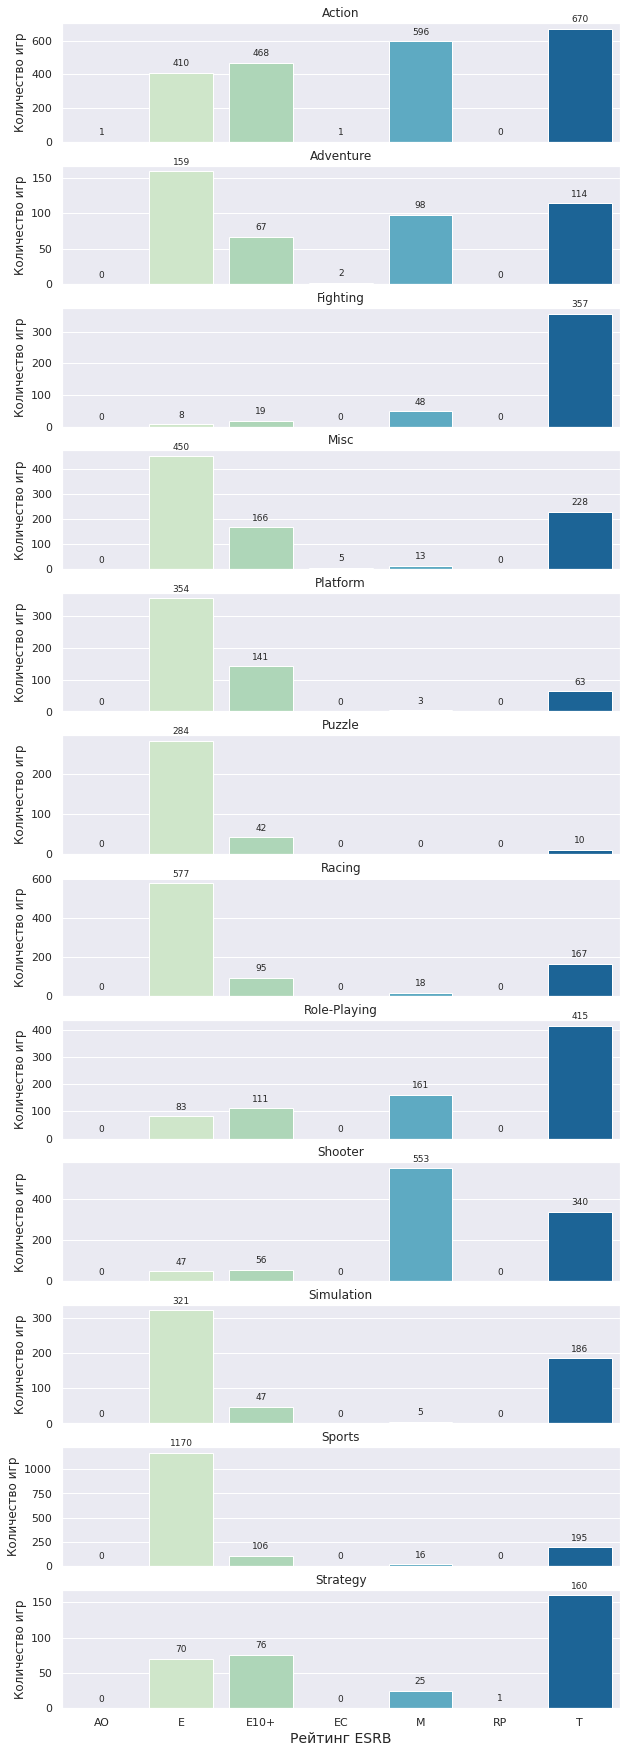

In [ ]:
# Построим диаграммы для каждого жанра отдельно
# и посмотрим, какие рейтинги преобладают

f, ax = plt.subplots(len(genre), 1, figsize=(10,31), sharex=True)
box_title = ''
i = 0

for a in ax:
    box_title = genre[i]
   
    bp = sns.barplot(data=pt_genre.query('genre == @box_title'), ax=a, palette='GnBu')
    
    for p in bp.patches:
        bp.annotate(format(round(p.get_height()), '.0f'), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha='center', va ='center', 
                   size=9,
                   xytext=(0,9), 
                   textcoords='offset points'
)    
    
    a.set_ylabel('Количество игр')
    a.set_xlabel(' ')
    a.set_title(box_title)

    i+=1
plt.xlabel('Рейтинг ESRB', size=14)
plt.show()

Как мы видим, однозначно определить рейтинг по жанру не представляется возможным (хотя определённые закономерности прослеживаются - как, например, преобладающий рейтинг E - Everyone - для игр жанра Пазлы и Гонки, или T - Teen - для жанра Стратегия). Интересно, что рейтинг AO (Adults Only) во всей выборке встречается только один раз - в игре жанра Action.
Теоретически, можно попробовать дозаполнить пропуски самым жестким ограничением из представленных для жанра, но будет ли это справедливо для каждой конкретной игры - большой вопрос, поэтому заполним пропуски (единообразно) служебным значением "нет данных" (N/A).

In [ ]:
# Рассмотрим редкие значения - AO и RP (встречаются по одному разу)

display(data.query('rating == "AO"'))
display(data.query('name == "Grand Theft Auto: San Andreas"'))

# Игра GTA первоначально вышла с рейтингом AO, но впоследствии рейтинг был изменен на M (на всех платформах);
# можно переопределить значение для платформы XBox, поскольку в 2005 г. рейтинг AO уже не присваивался
data['rating'] = data['rating'].where(data['rating'] != 'AO', 'M')

display(data.query('name == "Grand Theft Auto: San Andreas"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
867,Grand Theft Auto: San Andreas,XB,2005,Action,1.26,0.61,0.0,0.09,93,8.6,AO,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95,9.0,M,NaN
867,Grand Theft Auto: San Andreas,XB,2005,Action,1.26,0.61,0.00,0.09,93,8.6,AO,NaN
2094,Grand Theft Auto: San Andreas,PC,2005,Action,0.00,0.93,0.00,0.04,93,8.9,M,NaN
10160,Grand Theft Auto: San Andreas,X360,2008,Action,0.08,0.02,0.00,0.01,0,7.5,M,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95,9.0,M,NaN
867,Grand Theft Auto: San Andreas,XB,2005,Action,1.26,0.61,0.00,0.09,93,8.6,M,NaN
2094,Grand Theft Auto: San Andreas,PC,2005,Action,0.00,0.93,0.00,0.04,93,8.9,M,NaN
10160,Grand Theft Auto: San Andreas,X360,2008,Action,0.08,0.02,0.00,0.01,0,7.5,M,NaN


In [ ]:
# Единственное значение RP у игры Supreme Ruler: Cold War
display(data.query('rating == "RP"'))
display(data.query('name == "Supreme Ruler: Cold War"'))

# Судя по данным сайта ESRB, игра Supreme Ruler: Cold War получила в итоге рейтинг E, т.ч. можно заменить значение RP
data['rating'] = data['rating'].where(data['name'] != 'Supreme Ruler: Cold War', 'E')

display(data.query('name == "Supreme Ruler: Cold War"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
14057,Supreme Ruler: Cold War,PC,2011,Strategy,0.0,0.03,0.0,0.01,63,6.8,RP,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
14057,Supreme Ruler: Cold War,PC,2011,Strategy,0.0,0.03,0.0,0.01,63,6.8,RP,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
14057,Supreme Ruler: Cold War,PC,2011,Strategy,0.0,0.03,0.0,0.01,63,6.8,E,NaN


In [ ]:
# Заполним пропуски в рейтинге вспомогательным значением N/A (Not Availabe)

data['rating'] = data['rating'].fillna('N/A')

display(pd.pivot_table(data, index='rating', values='name', aggfunc=len))

,name
rating,
E,3934
E10+,1394
EC,8
M,1537
N/A,6681
T,2905


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16459 entries, 0 to 16458
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16459 non-null  object 
 1   platform         16459 non-null  object 
 2   year_of_release  16459 non-null  int64  
 3   genre            16459 non-null  object 
 4   na_sales         16459 non-null  float64
 5   eu_sales         16459 non-null  float64
 6   jp_sales         16459 non-null  float64
 7   other_sales      16459 non-null  float64
 8   critic_score     16459 non-null  int64  
 9   user_score       16459 non-null  float64
 10  rating           16459 non-null  object 
 11  year             15 non-null     object 
dtypes: float64(5), int64(2), object(5)
memory usage: 1.5+ MB


In [ ]:
# Поищем дубликаты по названию, платформе и году выхода игры
# Найдено одно совпадение (для платформы PS3)
display(data[data[['name','platform', 'year_of_release']].duplicated() == True])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
15983,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83,5.5,E,NaN


In [ ]:
display(data[(data['name'] == 'Madden NFL 13') & (data['platform'] == 'PS3')])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
603,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E,NaN
15983,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,5.5,E,NaN


In [ ]:
# Удалим дубликат с нулевыми продажами
data = data[(data['name'] != 'Madden NFL 13') | 
                 (data['platform'] != 'PS3') | 
                 (data['year_of_release'] != 2012) |
                 (data['na_sales'] != 0)].reset_index(drop=True
)     

In [ ]:
display(data[(data['name'] == 'Madden NFL 13') & (data['platform'] == 'PS3')])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
603,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16458 entries, 0 to 16457
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16458 non-null  object 
 1   platform         16458 non-null  object 
 2   year_of_release  16458 non-null  int64  
 3   genre            16458 non-null  object 
 4   na_sales         16458 non-null  float64
 5   eu_sales         16458 non-null  float64
 6   jp_sales         16458 non-null  float64
 7   other_sales      16458 non-null  float64
 8   critic_score     16458 non-null  int64  
 9   user_score       16458 non-null  float64
 10  rating           16458 non-null  object 
 11  year             15 non-null     object 
dtypes: float64(5), int64(2), object(5)
memory usage: 1.5+ MB


In [ ]:
# Итого - 16458 записей, все непустые (пустой только вспомогательный столбец, можно его удалить)
data.pop('year');

### Расчет суммарных продаж

In [ ]:
# Посчитаем суммарные продажи по регионам (в млн.копий)

data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,N/A,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,N/A,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,0.0,N/A,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,0.0,N/A,28.31


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16458 entries, 0 to 16457
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16458 non-null  object 
 1   platform         16458 non-null  object 
 2   year_of_release  16458 non-null  int64  
 3   genre            16458 non-null  object 
 4   na_sales         16458 non-null  float64
 5   eu_sales         16458 non-null  float64
 6   jp_sales         16458 non-null  float64
 7   other_sales      16458 non-null  float64
 8   critic_score     16458 non-null  int64  
 9   user_score       16458 non-null  float64
 10  rating           16458 non-null  object 
 11  total_sales      16458 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.5+ MB


### Вывод ###

Мы проанализировали заполнение исходных данных и выявили пропуски в столбцах:
- name, genre (2 строки - удалены)
- year_of_release
- critic_score
- user_score
- rating

Строки с пустым годом выпуска были удалены, строки с оценками были заполнены вспомогательными значениями. Рейтинг ESRB был дозаполнен значением N/A.
В итоге мы получили датасет с количеством строк 16458 (вместо 16715).

Было рассчитано и сохранено в новом столбце total_sales значение продаж по всем регионам (в млн.шт.)

## Исследовательский анализ данных ##

### Анализ данных по годам выпуска ###

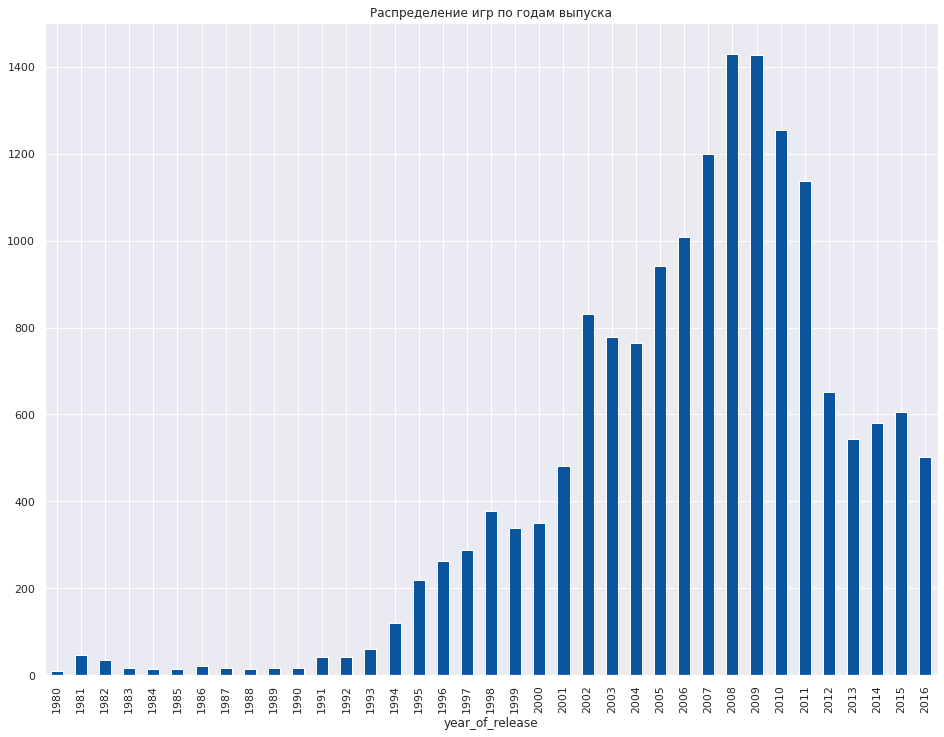

In [ ]:
# Посмотрим еще раз на распределение игр по годам выпуска
(
pd.pivot_table(data, index='year_of_release', values='name', aggfunc=len)
    .plot(kind='bar',
          grid=True,
          legend=False,
          figsize=(16, 12),
          title='Распределение игр по годам выпуска')
);

Резкий скачок в игровой индустрии можно увидеть после 2001 года (в 2002-м году количество выпускаемых игр увеличилось практически в 2 раза по сравнению с 2000-2001 годами). Первый всплеск, замеченный в 90-х годах, стабилизировался к 2000-му году, и нам он не очень интересен. Возьмем для дальнейшего анализа данные с 2001 по 2016 год.

In [ ]:
# Рассмотрим структуру выпуска игр в разрезе игровых платформ

platform = list(set(data['platform']))
platform.sort()

print('Всего платформ:', len(platform))
display(platform)

# Всего в датафрейме 31 платформа

Всего платформ: 31


['2600',
 '3DO',
 '3DS',
 'DC',
 'DS',
 'GB',
 'GBA',
 'GC',
 'GEN',
 'GG',
 'N64',
 'NES',
 'NG',
 'PC',
 'PCFX',
 'PS',
 'PS2',
 'PS3',
 'PS4',
 'PSP',
 'PSV',
 'SAT',
 'SCD',
 'SNES',
 'TG16',
 'WS',
 'Wii',
 'WiiU',
 'X360',
 'XB',
 'XOne']

In [ ]:
# Поскольку часть платформ вполне могла уже морально устареть, рассмотрим данные только с 2001 года

platform = list(set(data.query('year_of_release > 2001')['platform']))
platform.sort()

print('Всего платформ после 2001 года:', len(platform))
display(platform)

# С 2001 года количество используемых платформ уменьшилось на 13, их осталось всего 18

Всего платформ после 2001 года: 18


['3DS',
 'DC',
 'DS',
 'GBA',
 'GC',
 'N64',
 'PC',
 'PS',
 'PS2',
 'PS3',
 'PS4',
 'PSP',
 'PSV',
 'Wii',
 'WiiU',
 'X360',
 'XB',
 'XOne']

In [ ]:
# Создадим сводную таблицу по годам, начиная с 2002 г. (с итогами по платформам)
pt_platform = pd.pivot_table(data.query('year_of_release >= 2002'),
                             index='year_of_release',
                             columns='platform',
                             values='name',
                             aggfunc=len,
                             fill_value=0
)

display(pt_platform)

platform,3DS,DC,DS,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,
2002,0,1,0,198,152,1,19,20,280,0,0,0,0,0,0,0,159,0
2003,0,0,0,150,145,0,33,3,258,0,0,0,0,0,0,0,190,0
2004,0,0,23,175,83,0,30,0,261,0,0,15,0,0,0,0,177,0
2005,0,0,118,135,97,0,37,0,261,0,0,95,0,0,0,18,180,0
2006,0,0,201,39,40,0,52,0,261,27,0,189,0,44,0,93,62,0
2007,0,1,376,6,4,0,62,0,214,90,0,133,0,185,0,124,3,0
2008,0,1,493,0,0,0,76,0,191,138,0,101,0,282,0,146,1,0
2009,0,0,403,0,0,0,107,0,96,162,0,161,0,325,0,172,0,0
2010,0,0,323,0,0,0,90,0,38,181,0,188,0,253,0,182,0,0


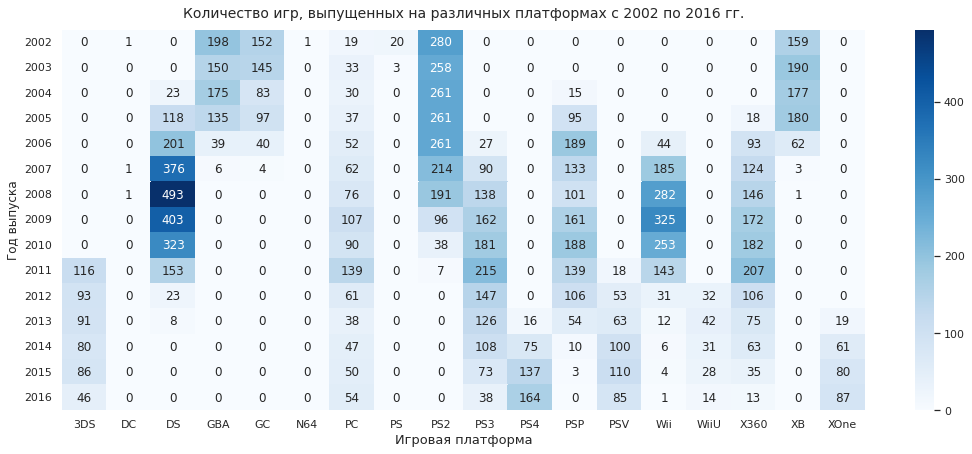

In [ ]:
# Построим тепловую карту для приведенной выше матрицы

plt.figure(figsize=(18,7))

h = sns.heatmap(data=pt_platform[platform], cmap='Blues', annot=True, fmt='1.0f')
h.set_title('Количество игр, выпущенных на различных платформах с 2002 по 2016 гг.', fontdict={'fontsize':14}, pad=12)
h.set_ylabel('Год выпуска')
h.set_xlabel('Игровая платформа', size=13)
plt.show()

По данным сводной таблицы и тепловой карты мы можем проследить, как трансформировалась популярность различных игровых платформ - исчезали одни и на их место приходили другие. Для построения прогнозов на 2017 год нам не понадобятся данные полностью исчерпавших себя платформ.
Чтобы построить прогноз продаж, нам достаточно будет взять восемь самых актуальных платформ (по данным 2015-2016 гг.):
- 3DS
- PC
- PS3 (постепенно вытесняется платформой PS4)
- PS4
- PSV
- WiiU
- X360
- XOne

На примере появившихся ранее, а затем исчезнувших платформ, мы можем увидеть, что примерная длительность жизненного цикла платформы составляет 8-9 лет (и только игры для ПК не теряют своей актуальности - хотя тоже переживают спады и подъёмы).

Следовательно для анализа более современных игровых платформ мы можем взять временной интервал с 2009 по 2016 год (а судя по тепловой карте - с 2011 по 2016 год).

In [ ]:
# Проанализируем суммарные продажи за те же годы (2002-2016)

pt_sales = pd.pivot_table(data.query('year_of_release >= 2002'),
                             index='year_of_release',
                             columns='platform',
                             values='total_sales',
                             aggfunc=np.sum,
                             fill_value=0
)

display(pt_sales)

platform,3DS,DC,DS,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,
2002,0.00,0.29,0.00,74.16,51.81,0.08,8.57,6.67,205.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,48.59,0.00
2003,0.00,0.00,0.00,56.67,50.91,0.00,8.84,2.07,185.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,55.40,0.00
2004,0.00,0.00,17.27,77.91,28.82,0.00,10.39,0.00,220.55,0.00,0.00,7.06,0.00,0.00,0.00,0.00,65.42,0.00
2005,0.00,0.00,130.14,33.86,27.62,0.00,4.37,0.00,160.98,0.00,0.00,43.84,0.00,0.00,0.00,8.25,49.23,0.00
2006,0.00,0.00,119.81,5.28,11.26,0.00,2.85,0.00,106.46,20.96,0.00,55.32,0.00,137.15,0.00,51.62,10.04,0.00
2007,0.00,0.02,146.94,3.40,0.27,0.00,9.28,0.00,75.99,73.19,0.00,46.93,0.00,152.77,0.00,95.42,0.55,0.00
2008,0.00,0.04,145.32,0.00,0.00,0.00,12.42,0.00,53.90,118.52,0.00,34.56,0.00,171.32,0.00,135.26,0.18,0.00
2009,0.00,0.00,119.54,0.00,0.00,0.00,16.91,0.00,26.40,130.93,0.00,37.78,0.00,206.97,0.00,120.29,0.00,0.00
2010,0.00,0.00,85.02,0.00,0.00,0.00,24.28,0.00,5.64,142.17,0.00,35.04,0.00,127.95,0.00,170.03,0.00,0.00


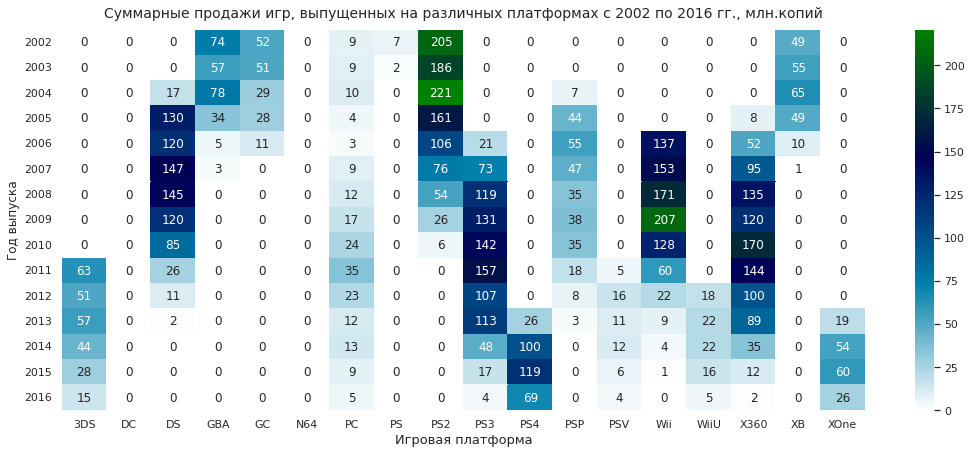

In [ ]:
# Построим карту распределения данных по продажам

plt.figure(figsize=(18,7))

h = sns.heatmap(data=pt_sales[platform], cmap='ocean_r', annot=True, fmt='1.0f')
h.set_title('Суммарные продажи игр, выпущенных на различных платформах с 2002 по 2016 гг., млн.копий',
            fontdict={'fontsize':14}, pad=12
)
h.set_ylabel('Год выпуска')
h.set_xlabel('Игровая платформа', size=13)
plt.show()

На тепловой карте, построенной по суммарным продажам, мы видим те же самые тенденции, что и на карте выпуска игр. Жизненный цикл многих платформ уже закончился (или заканчивается) к 2016 году. Показавшая в 2002 и 2004 гг. максимальную прибыль платформа PS2 к 2011 году ушла с рынка и уступила место новым версиям (PS3, PS4). То же самое произошло с лидером 2009 года - платформой Wii (она уступила место WiiU).

Соответственно, актуальными (потенциально прибыльными) мы можем считать всего шесть платформ:
- 3DS
- PC
- PS4
- PSV
- WiiU
- XOne

PS3 и X360 находятся в финальной стадии своего жизненного цикла и не выглядят перспективными для 2017 года.

Что касается интервала времени, который нам пригодится для сбора статистики по продажам - можно взять период с 2011 по 2016 год, туда попадут все ранее перечисленные игровые платформы.

In [ ]:
# Построим сводную таблицу по количеству игр, выпущенных с 2011 года
pt_platform = pd.pivot_table(data.query('year_of_release >= 2011'),
                             index='year_of_release',
                             columns='platform',
                             values='name',
                             aggfunc=len,
                             fill_value=0
)
pt_platform.reset_index(inplace=True)

display(pt_platform)

platform,year_of_release,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2011,116,153,139,7,215,0,139,18,143,0,207,0
1,2012,93,23,61,0,147,0,106,53,31,32,106,0
2,2013,91,8,38,0,126,16,54,63,12,42,75,19
3,2014,80,0,47,0,108,75,10,100,6,31,63,61
4,2015,86,0,50,0,73,137,3,110,4,28,35,80
5,2016,46,0,54,0,38,164,0,85,1,14,13,87


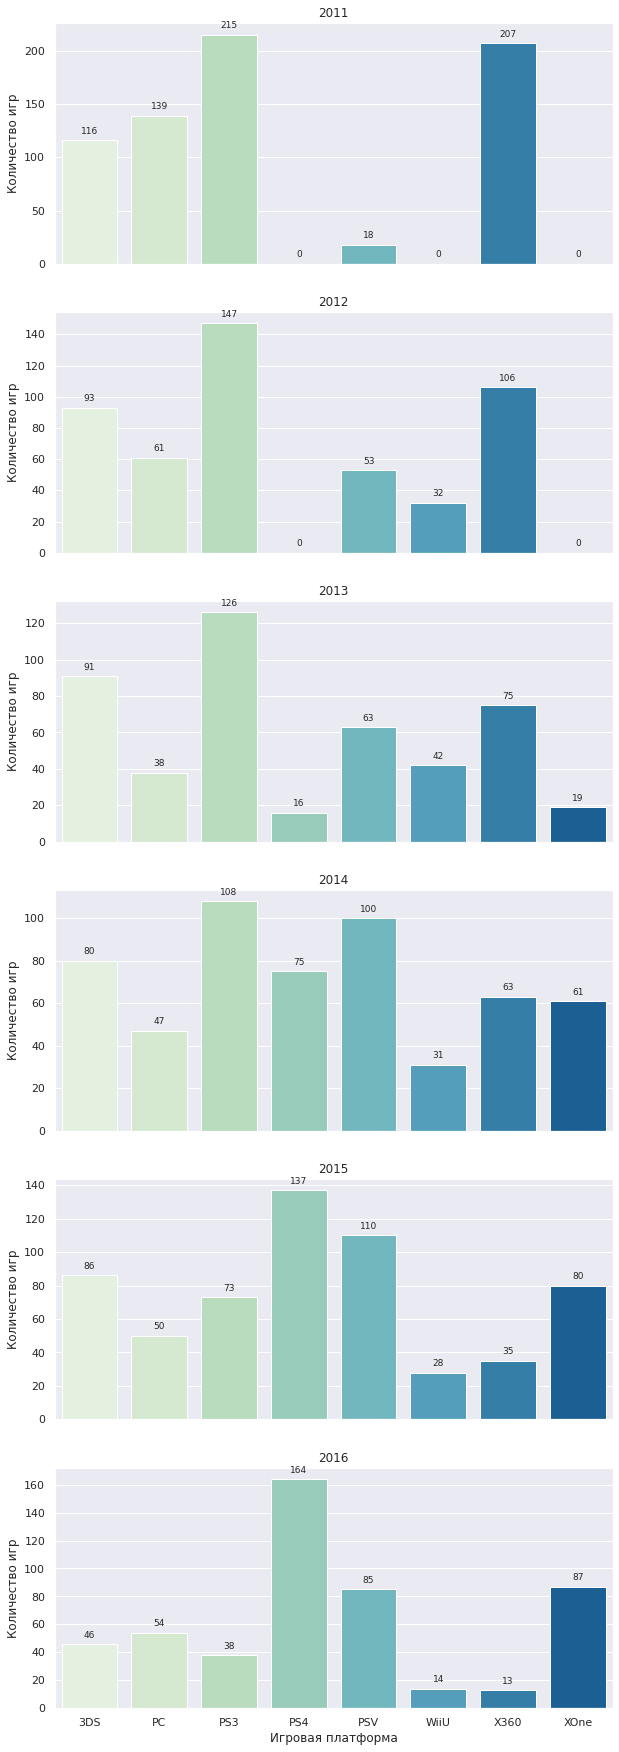

In [ ]:
# Переопределим список анализируемых платформ (оставим пока PS3 и X360 в списке)

platform = ['3DS','PC', 'PS3', 'PS4','PSV','WiiU', 'X360', 'XOne']

# Построим диаграммы выпуска игр по годам, начиная с 2011 г., для актуальных платформ

years = list(pt_platform['year_of_release'])

f, ax = plt.subplots(len(years), 1, figsize=(10,31), sharex=True)

box_title = ''
i = 0

for a in ax:
    box_title = years[i]
   
    bp = sns.barplot(data=pt_platform.query('year_of_release == @box_title')[platform], ax=a, palette='GnBu')
    
    for p in bp.patches:
        bp.annotate(format(round(p.get_height()), '.0f'), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha='center', va ='center', 
                   size=9,
                   xytext=(0,9), 
                   textcoords='offset points'
)    
    
    a.set_ylabel('Количество игр')
    a.set_xlabel(' ')
    a.set_title(box_title)

    i+=1
plt.xlabel('Игровая платформа', size=12)
plt.show()

Из этой серии диаграмм мы можем получить представление о том, что наиболее актуальный (для 2016 года) набор платформ стал складываться только с **2013** года.

### Анализ продаж за период с 2013 по 2016 гг. ###

In [ ]:
# Сделаем срез нашего исходного датафрейма для работы с данными за 4 года (период с 2013 по 2016 год)

data4 = data.query('year_of_release >= 2013').reset_index(drop=True)
data4.head(20)

# В новом датафрейме 2233 записи

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,N/A,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0,0.0,N/A,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
5,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0,0.0,N/A,11.68
6,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73,2.6,M,10.24
7,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71,2.6,M,9.36
8,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,0,0.0,N/A,9.18
9,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58


In [ ]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     2233 non-null   int64  
 9   user_score       2233 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 209.5+ KB


In [ ]:
display(list(set(data4['platform'])))

['Wii', 'WiiU', 'PC', '3DS', 'PS3', 'X360', 'PSP', 'PS4', 'DS', 'XOne', 'PSV']

In [ ]:
# Посмотрим на описательную статистику продаж в новом датафрейме:
# для удобства просмотра - создадим вспомогательный список регионов продаж
region = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']

data4[region].describe()

,na_sales,eu_sales,jp_sales,other_sales,total_sales
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000
mean,0.196019,0.175652,0.063045,0.053726,0.488442
std,0.547730,0.512451,0.233997,0.165693,1.235226
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.030000
50%,0.020000,0.030000,0.010000,0.010000,0.110000
75%,0.150000,0.130000,0.050000,0.040000,0.400000
max,9.660000,9.090000,4.350000,3.960000,21.050000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


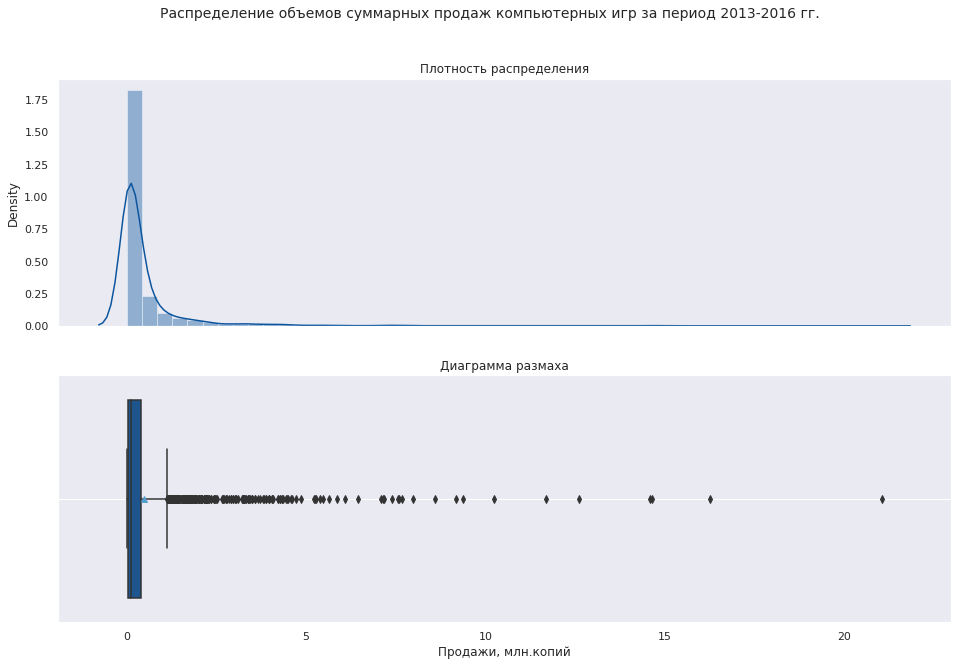

In [ ]:
# Посмотрим на график плотности распределения суммарных продаж (total_sales) совместно с диаграммой размаха
# Расположим графики друг под другом в один столбец

f, ax = plt.subplots(2, 1, sharex=True, figsize=(16, 10))

ax[0].set_title('Плотность распределения')
ax[1].set_title('Диаграмма размаха')

sns.distplot(data4['total_sales'], ax=ax[0])
sns.boxplot(data4['total_sales'], whis=1.95, showmeans=True, ax=ax[1])

# Добавим подписи оси X
ax[0].set_xlabel('')
ax[1].set_xlabel('Продажи, млн.копий')

ax[0].grid()
ax[1].grid()
# Добавим общий заголовок
plt.suptitle('Распределение объемов суммарных продаж компьютерных игр за период 2013-2016 гг.', size=14)
plt.show()

Мы видим, что распределение total_sales смещено вправо, в область высоких значений, матожидание (488 тыс.) больше медианы (110 тыс.), при этом максимальное значение составляет десятки миллионов (21 млн.копий у GTA).

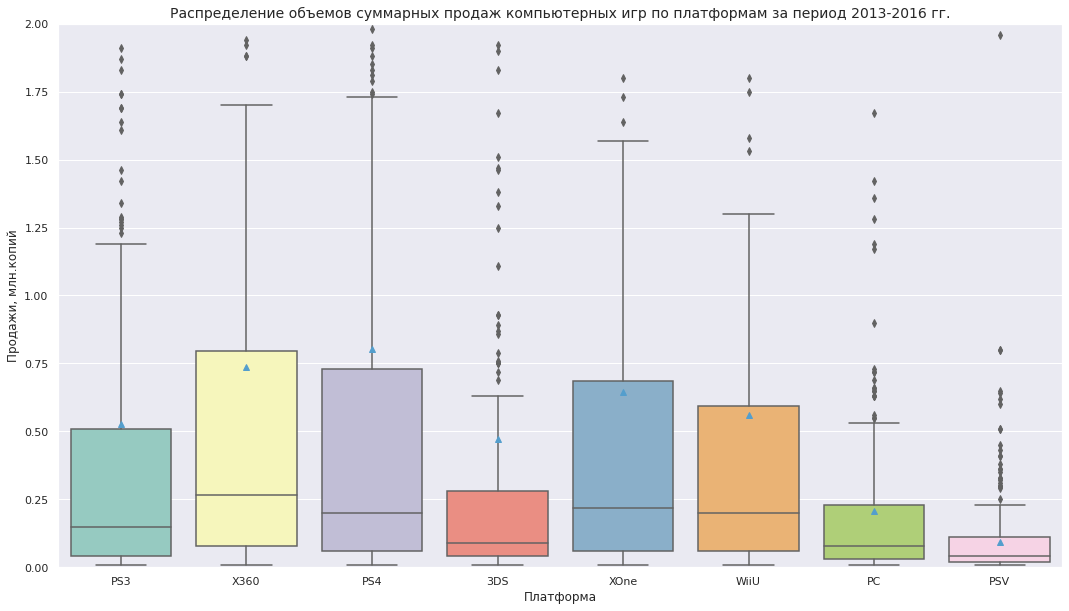

In [ ]:
# Построим диаграммы размаха по платформам (из того же датафрейма, data4):
# Вернёмся к списку "актуальных" платформ (список platform из 8 значений)
# Пройдем по нему и построим диаграммы суммарных продаж по каждой платформе

plt.figure(figsize=(18, 10))
plt.title('Распределение объемов суммарных продаж компьютерных игр по платформам за период 2013-2016 гг.', size=14)
plt.ylim([0,2])
sns.boxplot(data=data4.query('platform in @platform'), x='platform', y='total_sales', palette='Set3', showmeans=True)
plt.ylabel('Продажи, млн.копий')
plt.xlabel('Платформа')
plt.show()

При сравнении данных по диаграммам размаха мы видим выбросы (очень высокие объёмы продаж - десять и более миллионов копий) у тех платформ, которые ранее были очень успешны (PS3 и X360), однако в дальнейшем мы не можем прогнозировать столь же высоких результатов, поскольку эти платформы уже прошли свой пик и постепенно уходят с рынка.
Из оставшихся - мы видим PS4 и XOne с высоким средним значением (и существенным интерквартильным размахом). Также мы видим примерно равные значени матожидания (~ 500 тыс.копий) у платформ WiiU и 3DS. Самые скромные результаты показывают игры для ПК и PSV.

In [ ]:
# Исключим из рассмотрения платформы PS3 и X360
platform = ['PS4', '3DS', 'XOne', 'WiiU', 'PC', 'PSV']

# Посмотрим статистику самой успешной платформы из оставшихся - PS4
data4.query('platform == "PS4"')['total_sales'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

In [ ]:
# Рассмотрим статистические данные по всем платформам из нашего нового "актуального" списка

for value in platform:
    print('---Платформа---')
    print('   ', value)
    print('Количество игр, вышедших за период 2013-2016:', len(data4.query('platform == @value')['name']))
    print('Продажи игр, вышедших за период 2013-2016 (млн.копий):', round(data4.query('platform == @value')['total_sales']
                                                                          .sum(),3)
)
    print('Матожидание:', round(data4.query('platform == @value')['total_sales'].mean(), 3))
    print('Медиана:', round(data4.query('platform == @value')['total_sales'].median(), 3))
    print('Дисперсия:', round(np.var(data4.query('platform == @value')['total_sales']), 3))
    print('Стандартное отклонение:', round(np.std(data4.query('platform == @value')['total_sales']), 3))
    
# По всем платформам мы видим большой разброс значений (что было видно и на диаграммах)

---Платформа---
    PS4
Количество игр, вышедших за период 2013-2016: 392
Продажи игр, вышедших за период 2013-2016 (млн.копий): 314.14
Матожидание: 0.801
Медиана: 0.2
Дисперсия: 2.584
Стандартное отклонение: 1.607
---Платформа---
    3DS
Количество игр, вышедших за период 2013-2016: 303
Продажи игр, вышедших за период 2013-2016 (млн.копий): 143.25
Матожидание: 0.473
Медиана: 0.09
Дисперсия: 1.902
Стандартное отклонение: 1.379
---Платформа---
    XOne
Количество игр, вышедших за период 2013-2016: 247
Продажи игр, вышедших за период 2013-2016 (млн.копий): 159.32
Матожидание: 0.645
Медиана: 0.22
Дисперсия: 1.069
Стандартное отклонение: 1.034
---Платформа---
    WiiU
Количество игр, вышедших за период 2013-2016: 115
Продажи игр, вышедших за период 2013-2016 (млн.копий): 64.63
Матожидание: 0.562
Медиана: 0.2
Дисперсия: 1.07
Стандартное отклонение: 1.034
---Платформа---
    PC
Количество игр, вышедших за период 2013-2016: 189
Продажи игр, вышедших за период 2013-2016 (млн.копий): 39.43
Мато

### Анализ продаж по одной из популярных платформ (PS4) ###

In [ ]:
# Возьмём подмножество нашего датафрейма для PS4 (содержащее данные об оценках и суммарных продажах)

ps4 = data4.query('platform == "PS4"')[['name', 'critic_score', 'user_score', 'total_sales']].reset_index(drop=True)
ps4.head(20)

,name,critic_score,user_score,total_sales
0,Call of Duty: Black Ops 3,0,0.0,14.63
1,Grand Theft Auto V,97,8.3,12.62
2,FIFA 16,82,4.3,8.58
3,Star Wars Battlefront (2015),0,0.0,7.98
4,Call of Duty: Advanced Warfare,83,5.7,7.66
5,FIFA 17,85,5.0,7.60
6,Fallout 4,87,6.5,7.17
7,FIFA 15,82,5.7,6.08
8,Destiny,76,6.1,5.64
9,Uncharted 4: A Thief's End,93,7.9,5.39


In [ ]:
ps4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          392 non-null    object 
 1   critic_score  392 non-null    int64  
 2   user_score    392 non-null    float64
 3   total_sales   392 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 12.4+ KB


In [ ]:
# Построим матрицы корреляции (попарно) между оценками критиков и продажами
# и между оценками пользователей и продажами
# (зависимость оценок друг от друга можно не рассматривать)

# Оценки критиков (ненулевые, взятые из исходных данных)
ps4.query('critic_score > 0')[['critic_score', 'total_sales']].corr()

# Мы можем наблюдать слабую положительную корреляцию 0.4 между оценками критиков и продажами

,critic_score,total_sales
critic_score,1.000000,0.406568
total_sales,0.406568,1.000000


In [ ]:
# Оценки пользователей (тоже ненулевые)
ps4.query('user_score > 0')[['user_score', 'total_sales']].corr()

# Здесь складывается интересная картина - видна отрицательная корреляция
# (т.е. получается, что иногда даже низкие оценки могут дать хорошие продажи)
# Но корреляция настолько слабая, что её можно считать нулевой (т.е. зависимости между этими переменными почти нет)

,user_score,total_sales
user_score,1.000000,-0.031957
total_sales,-0.031957,1.000000


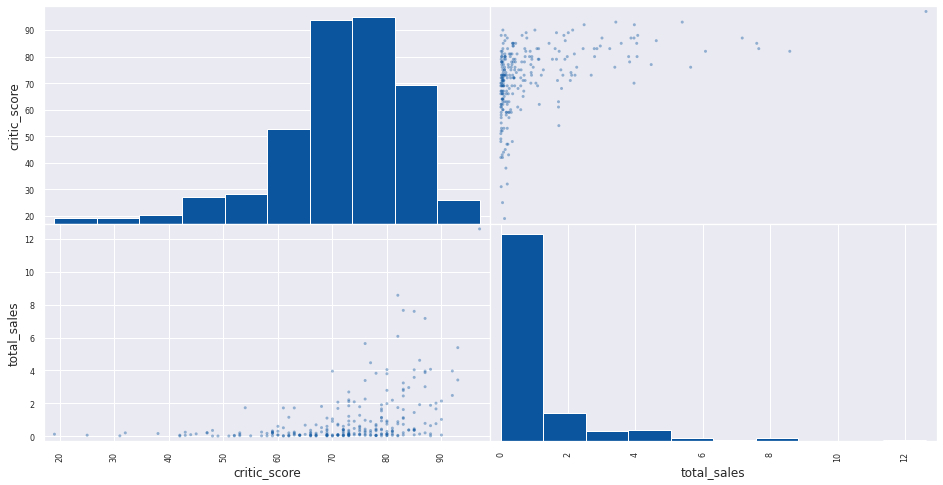

In [ ]:
# Визуализируем две матрицы рассеяния

pd.plotting.scatter_matrix(ps4.query('critic_score > 0')[['critic_score', 'total_sales']], alpha = 0.4, figsize = (16,8));

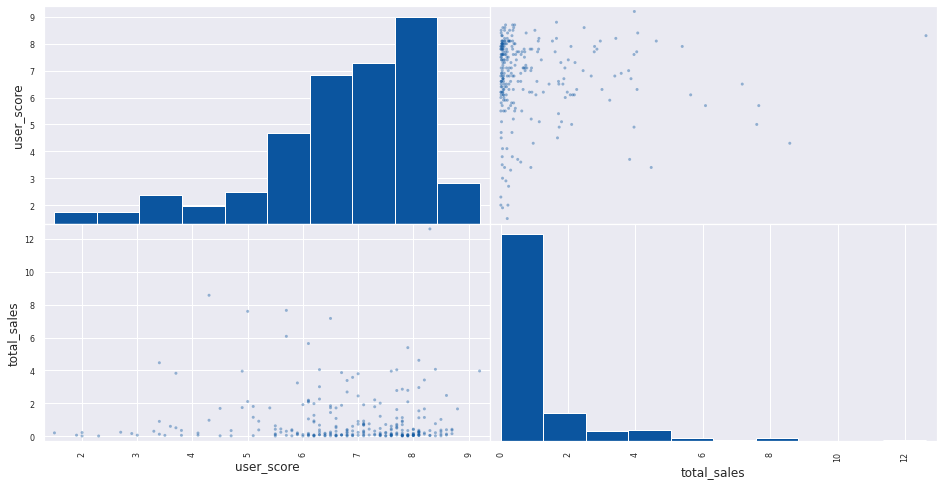

In [ ]:
pd.plotting.scatter_matrix(ps4.query('user_score > 0')[['user_score', 'total_sales']], alpha = 0.4, figsize = (16,8));

Оценки критиков, если и способствуют продажам, то в незначительной степени (виден небольшой всплеск продаж в области высоких оценок). Что касается оценок пользователей, то они практически не коррелируют с продажами - мы видим, что и в области невысоких оценок (4-6 баллов) продажи всё равно идут в существенном объеме (5-10 млн.копий), что, по-видимому, связано с индивидуальными предпочтениями и привычками пользователей, которые трудно изменить выставлением невысоких оценок.

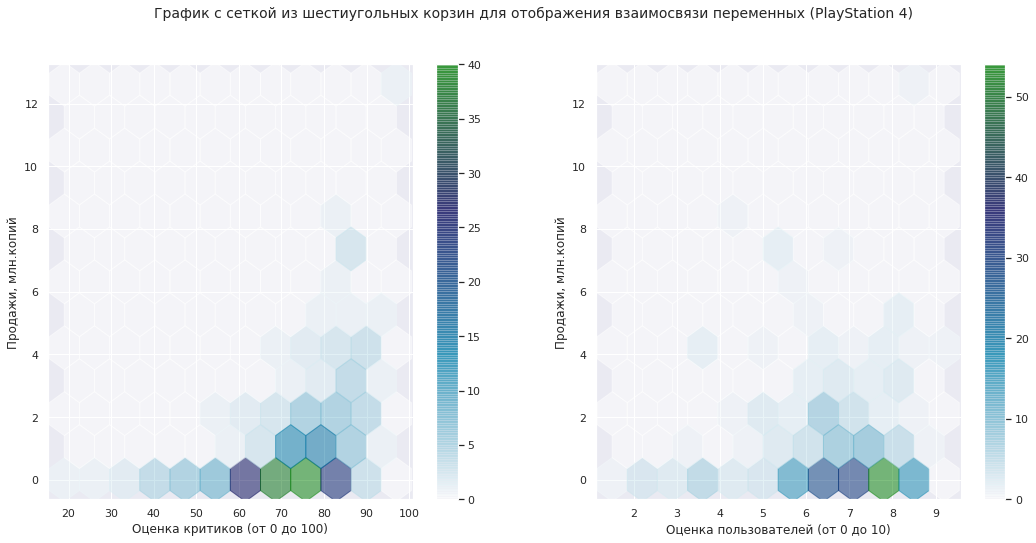

In [ ]:
# Построим также диаграммы hexbin для (ненулевых) оценок и продаж

f, ax = plt.subplots(1,2, figsize=(18, 8))

ps4.query('critic_score > 0').plot.hexbin(x='critic_score', y='total_sales', ax=ax[0], gridsize=11, cmap='ocean_r', alpha=0.5)
ax[0].set_xlabel('Оценка критиков (от 0 до 100)')
ax[0].set_ylabel('Продажи, млн.копий')

ps4.query('user_score > 0').plot.hexbin(x='user_score', y='total_sales', ax=ax[1], gridsize=11, cmap='ocean_r', alpha=0.5)
ax[1].set_xlabel('Оценка пользователей (от 0 до 10)')
ax[1].set_ylabel('Продажи, млн.копий')

plt.suptitle('График с сеткой из шестиугольных корзин для отображения взаимосвязи переменных (PlayStation 4)', size=14)
plt.show()

Как мы видим, оценки влияют на продажи не очень существенно (хотя прослеживается небольшое увеличение объемов продаж в области высоких оценок критиков).

In [ ]:
# Проведем анализ для платформы XBox One

xbox = data4.query('platform == "XOne"')[['name', 'critic_score', 'user_score', 'total_sales']].reset_index(drop=True)
xbox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          247 non-null    object 
 1   critic_score  247 non-null    int64  
 2   user_score    247 non-null    float64
 3   total_sales   247 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.8+ KB


In [ ]:
# Оценки критиков (ненулевые)
xbox.query('critic_score > 0')[['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.416998
total_sales,0.416998,1.000000


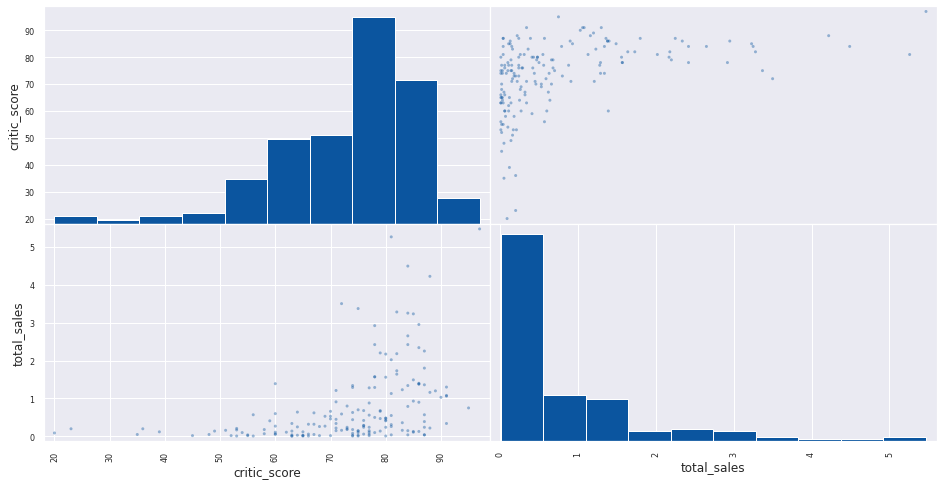

In [ ]:
pd.plotting.scatter_matrix(xbox.query('critic_score > 0')[['critic_score', 'total_sales']], alpha = 0.4, figsize = (16,8));

In [ ]:
# Оценки пользователей (ненулевые)
xbox.query('user_score > 0')[['user_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,-0.068925
total_sales,-0.068925,1.000000


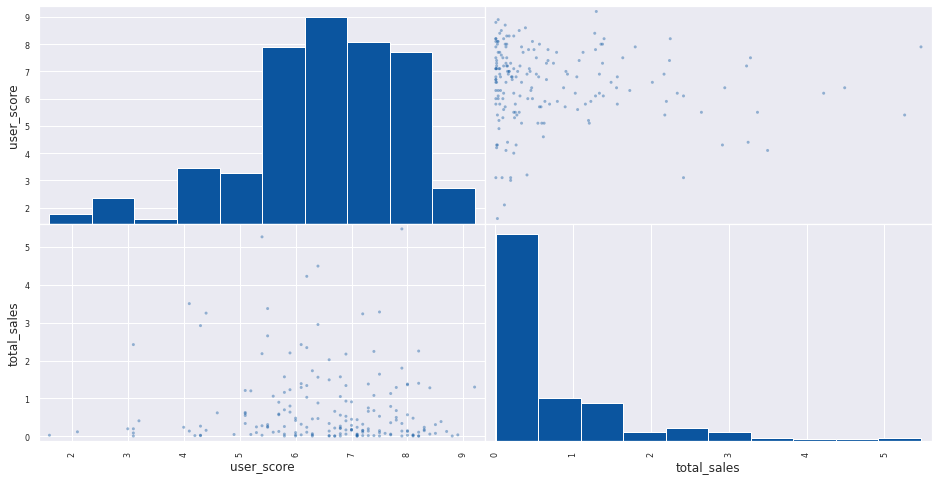

In [ ]:
pd.plotting.scatter_matrix(xbox.query('user_score > 0')[['user_score', 'total_sales']], alpha = 0.4, figsize = (16,8));

Мы видим колебание параметров в тех же пределах - слабая положительная корреляция продаж с оценками критиков (0.4), почти нулевая (но при этом отрицательная) корреляция продаж и оценок пользователей.

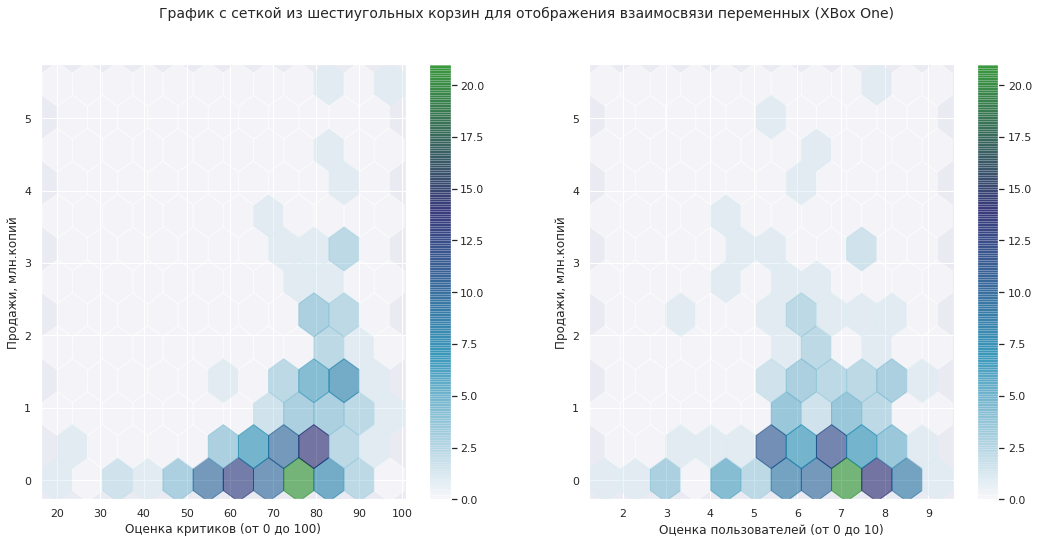

In [ ]:
# Построим также диаграммы hexbin для (ненулевых) оценок и продаж

f, ax = plt.subplots(1,2, figsize=(18, 8))

xbox.query('critic_score > 0').plot.hexbin(x='critic_score', y='total_sales', ax=ax[0], gridsize=11, cmap='ocean_r', alpha=0.5)
ax[0].set_xlabel('Оценка критиков (от 0 до 100)')
ax[0].set_ylabel('Продажи, млн.копий')

xbox.query('user_score > 0').plot.hexbin(x='user_score', y='total_sales', ax=ax[1], gridsize=11, cmap='ocean_r', alpha=0.5)
ax[1].set_xlabel('Оценка пользователей (от 0 до 10)')
ax[1].set_ylabel('Продажи, млн.копий')

plt.suptitle('График с сеткой из шестиугольных корзин для отображения взаимосвязи переменных (XBox One)', size=14)
plt.show()

In [ ]:
# Проведем анализ для платформы Nintendo 3DS

ds = data4.query('platform == "3DS"')[['name', 'critic_score', 'user_score', 'total_sales']].reset_index(drop=True)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          303 non-null    object 
 1   critic_score  303 non-null    int64  
 2   user_score    303 non-null    float64
 3   total_sales   303 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 9.6+ KB


In [ ]:
# Оценки критиков (ненулевые)
ds.query('critic_score > 0')[['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.357057
total_sales,0.357057,1.000000


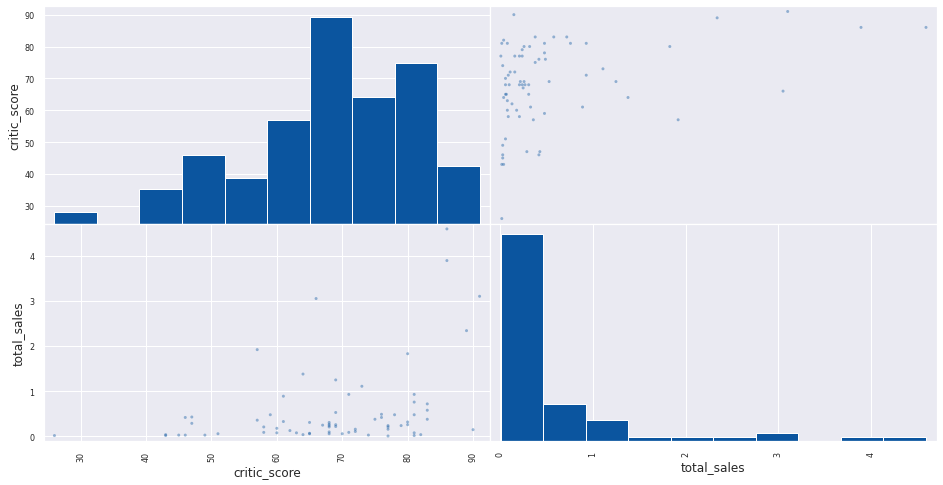

In [ ]:
pd.plotting.scatter_matrix(ds.query('critic_score > 0')[['critic_score', 'total_sales']], alpha = 0.4, figsize = (16,8));

In [ ]:
# Оценки пользователей (ненулевые)
ds.query('user_score > 0')[['user_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,0.241504
total_sales,0.241504,1.000000


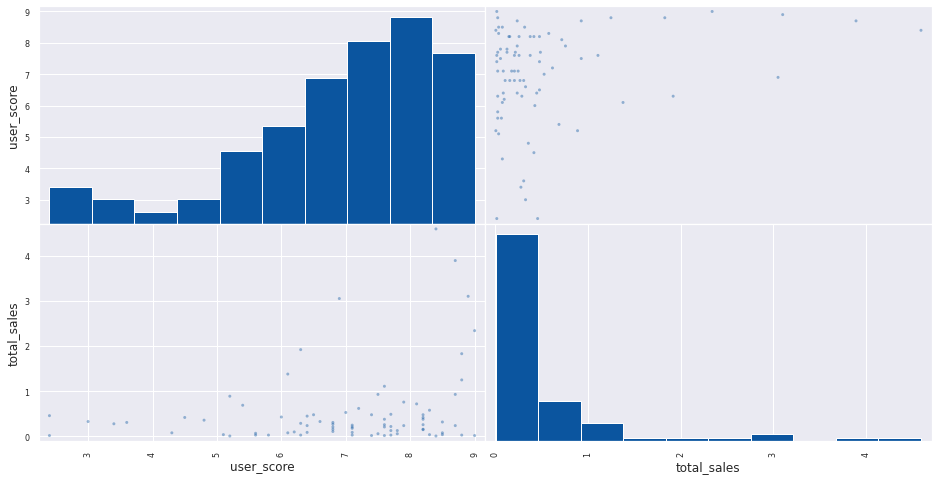

In [ ]:
pd.plotting.scatter_matrix(ds.query('user_score > 0')[['user_score', 'total_sales']], alpha = 0.4, figsize = (16,8));

У платформы Nintendo выявлена более слабая (0.35) корреляция продаж с оценками критиков, но зато более сильная (чем в двух предыдущих случаях) и к тому же положительная корреляция продаж с оценками пользователей (0.24).
Если вспомнить, что 3DS - лидер продаж в Японии, можно предположить, что менталитет японцев оказывает влияние и на общее отношение к оценкам других пользователей.

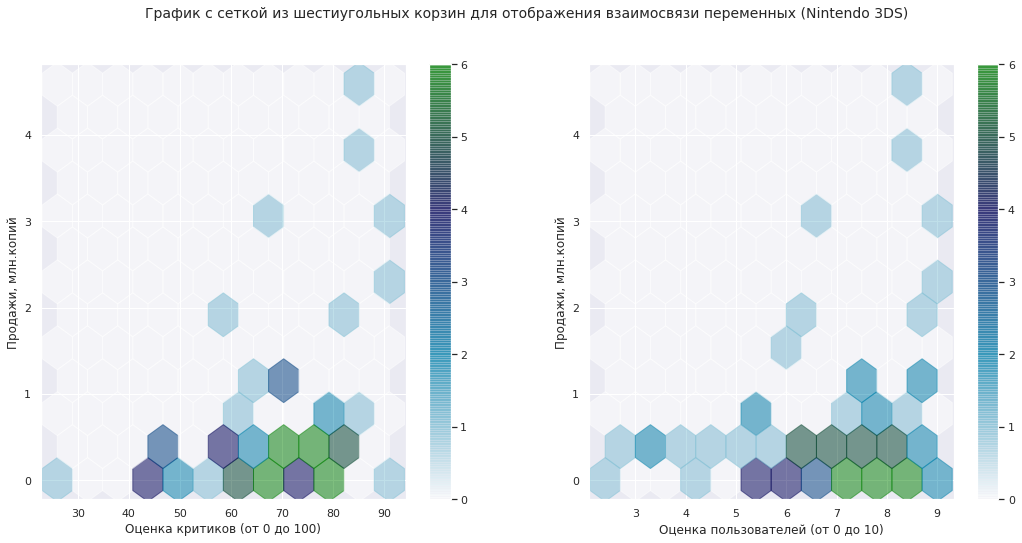

In [ ]:
# Построим также диаграммы hexbin для (ненулевых) оценок и продаж

f, ax = plt.subplots(1,2, figsize=(18, 8))

ds.query('critic_score > 0').plot.hexbin(x='critic_score', y='total_sales', ax=ax[0], gridsize=11, cmap='ocean_r', alpha=0.5)
ax[0].set_xlabel('Оценка критиков (от 0 до 100)')
ax[0].set_ylabel('Продажи, млн.копий')

ds.query('user_score > 0').plot.hexbin(x='user_score', y='total_sales', ax=ax[1], gridsize=11, cmap='ocean_r', alpha=0.5)
ax[1].set_xlabel('Оценка пользователей (от 0 до 10)')
ax[1].set_ylabel('Продажи, млн.копий')

plt.suptitle('График с сеткой из шестиугольных корзин для отображения взаимосвязи переменных (Nintendo 3DS)', size=14)
plt.show()

In [ ]:
pc = data4.query('platform == "PC"')[['name', 'critic_score', 'user_score', 'total_sales']].reset_index(drop=True)
pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          189 non-null    object 
 1   critic_score  189 non-null    int64  
 2   user_score    189 non-null    float64
 3   total_sales   189 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.0+ KB


In [ ]:
# Оценки критиков (ненулевые)
pc.query('critic_score > 0')[['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.00000,0.19603
total_sales,0.19603,1.00000


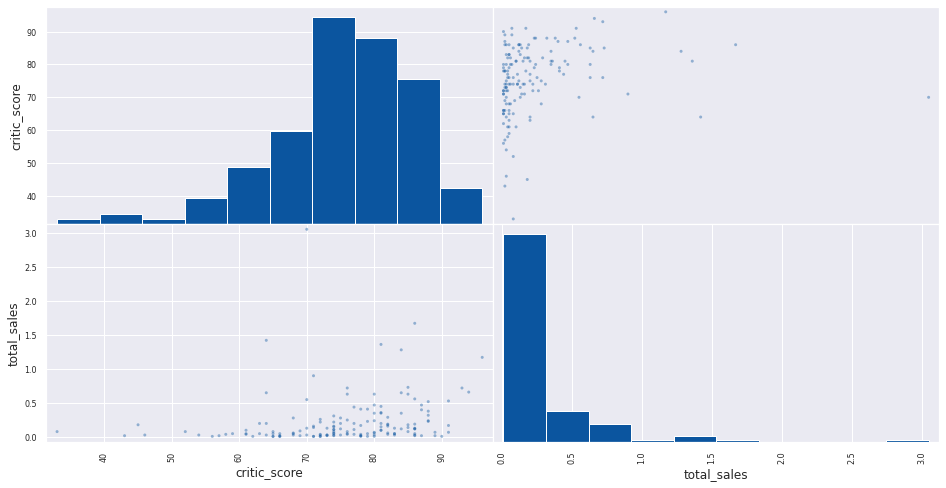

In [ ]:
pd.plotting.scatter_matrix(pc.query('critic_score > 0')[['critic_score', 'total_sales']], alpha = 0.4, figsize = (16,8));

In [ ]:
# Оценки пользователей (ненулевые)
pc.query('user_score > 0')[['user_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,-0.093842
total_sales,-0.093842,1.000000


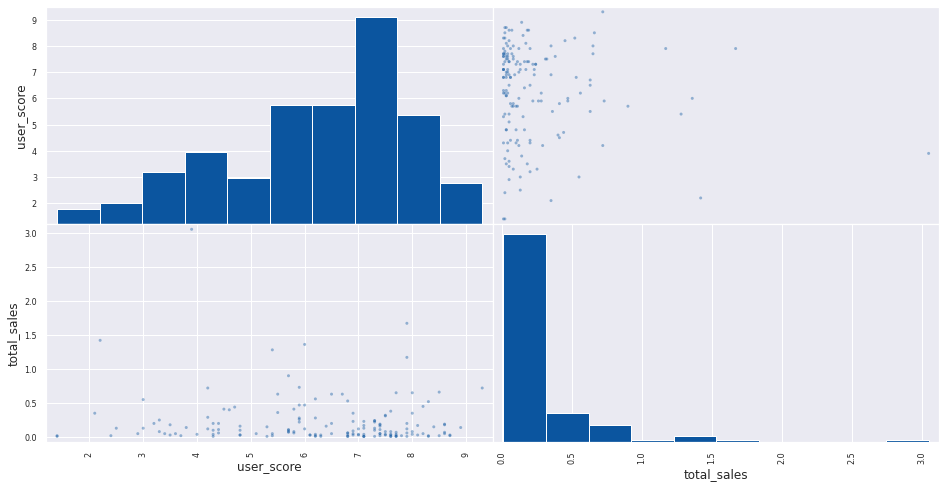

In [ ]:
pd.plotting.scatter_matrix(pc.query('user_score > 0')[['user_score', 'total_sales']], alpha = 0.4, figsize = (16,8));

Полученные значения по играм для ПК очень интересны - мы видим самую слабую (из рассмотренных) положительную корреляцию продаж с оценками критиков (0.19), и при этом отрицательную (но тоже очень слабую) корреляцию продаж с оценками пользователей (-0.09). Видимо, у покупателей игр для ПК сложилось полностью устоявшееся суждение о необходимости покупки тех или иных игр, и наличие невысоких оценок не является для них сдерживающим фактором.

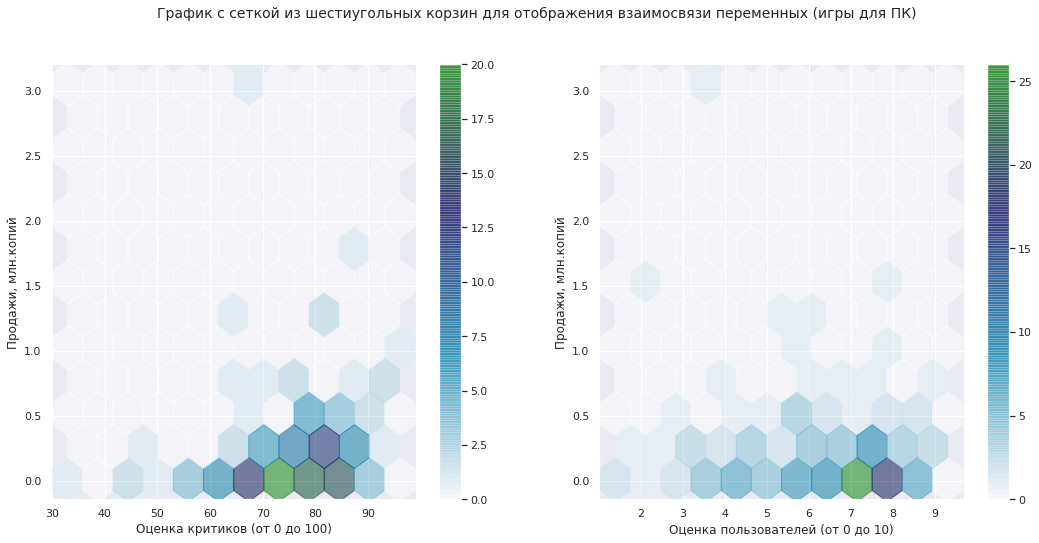

In [ ]:
# Построим также диаграммы hexbin для (ненулевых) оценок и продаж

f, ax = plt.subplots(1,2, figsize=(18, 8))

pc.query('critic_score > 0').plot.hexbin(x='critic_score', y='total_sales', ax=ax[0], gridsize=11, cmap='ocean_r', alpha=0.5)
ax[0].set_xlabel('Оценка критиков (от 0 до 100)')
ax[0].set_ylabel('Продажи, млн.копий')

pc.query('user_score > 0').plot.hexbin(x='user_score', y='total_sales', ax=ax[1], gridsize=11, cmap='ocean_r', alpha=0.5)
ax[1].set_xlabel('Оценка пользователей (от 0 до 10)')
ax[1].set_ylabel('Продажи, млн.копий')

plt.suptitle('График с сеткой из шестиугольных корзин для отображения взаимосвязи переменных (игры для ПК)', size=14)
plt.show()

Можно сделать вывод — по всем рассмотренным платформам — что оценки пользователей и критиков не оказывают существенного влияния на объемы продаж.

### Анализ продаж по жанрам ###

In [ ]:
# Посмотрим на распределение объемов продаж по жанрам игр (за 4 года)
# Соберем данные по количеству игр и продажам в сводную таблицу
sales_by_genre = pd.pivot_table(data4, index='genre', values='total_sales', aggfunc=[len, np.sum])
sales_by_genre.reset_index(inplace=True)
sales_by_genre.columns = ['genre', 'volume', 'sales']
# Отсортируем по продажам (по убыванию)
sales_by_genre = sales_by_genre.sort_values(by='sales', ascending=False).reset_index(drop=True)
sales_by_genre['volume'] = sales_by_genre['volume'].astype(int)
display(sales_by_genre)

,genre,volume,sales
0,Action,766,321.87
1,Shooter,187,232.98
2,Sports,214,150.65
3,Role-Playing,292,145.89
4,Misc,155,62.82
5,Platform,74,42.63
6,Racing,85,39.89
7,Fighting,80,35.31
8,Adventure,245,23.64
9,Simulation,62,21.76


Явным лидером (и по количеству проданных копий, и по количеству релизов) является жанр Action, а аутсайдером - жанр Puzzle.
Видимо, это связано с возрастом заинтересованной (платежеспособной) целевой аудитории, которая готова платить за Экшн,
в то время как логические игры - пазлы и головоломки, скорее всего, покупают родители своим детям. И, конечно, такие игры не могут составить конкуренцию динамичным "экшенам и стрелялкам".

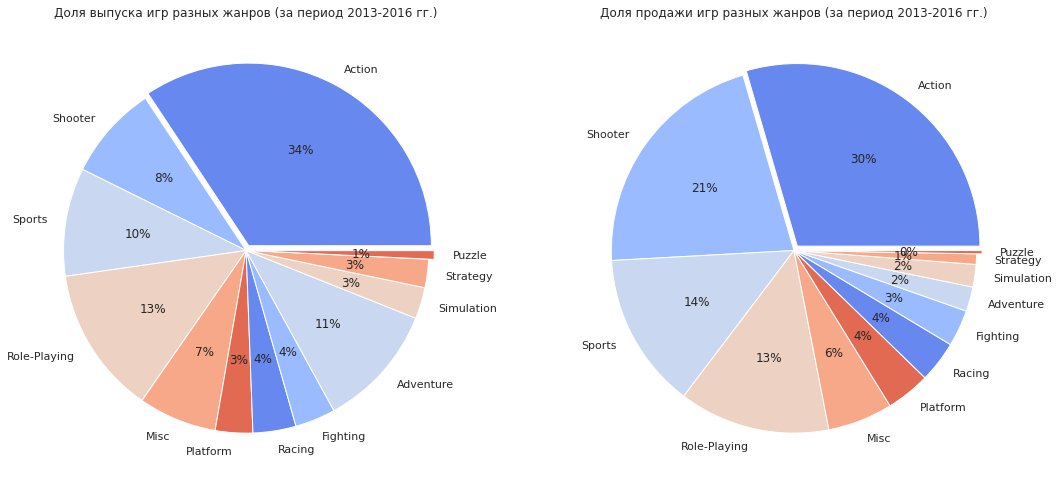

In [ ]:
# Дополнительно - построим круговые диаграммы для визуализации полученных нами значений:
# Доля выпуска игр разных жанров и доля продаж игр разных жанров

cp = sns.color_palette('coolwarm')

fig, ax = plt.subplots(1, 2, figsize=(18, 18))

labels = list(sales_by_genre['genre'])

ax[0].set(title='Доля выпуска игр разных жанров (за период 2013-2016 гг.)')
ax[0].pie(list(sales_by_genre['volume']),
          labels=labels,
          colors=cp,
          autopct='%1.0f%%',
          explode=(0.03, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.03)
)

ax[1].set(title='Доля продажи игр разных жанров (за период 2013-2016 гг.)')
ax[1].pie(list(sales_by_genre['sales']), 
          labels=labels,
          colors=cp,
          autopct='%1.0f%%',
          explode=(0.03, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.03)
)

fig.show()

Интересно, что продажа Шутеров в сумме с играми жанра Экшн даёт сразу 51% от общего объёма продаж (а вместе со Спортом - 65%). При этом выпуск таких игр в сумме даёт только 42% (а вместе со Спортом - 52%). То есть спрос на активные игры превышает предложение - что даёт дополнительные идеи для роста в данном сегменте.

РПГ стабильно занимают свою долю (13%) и в выпуске, и в продажах.

В то же время выпускаемые в значительном количестве игры жанра Adventure (11% выпуска) в общем объеме продаж составляют только 2%. По всей видимости, в перспективный план развития магазина игры этого жанра не попадут.

### Вывод ###

Мы проанализировали выпуск компьютерных игр по всему массиву, начиная с 1980 года, и сделали вывод, что актуальным для нас является период с 2013 по 2016 год (и восемь популярных игровых платформ, которые имеют перспективы развития в 2017 году).

По данным самой "перспективной" платформы - PS4 - мы построили матрицу корреляции между продажами и оценками критиков/пользователей и выявили очень слабую положительную корреляцию между оценками и объемом продаж.

При анализе доли разных жанров на рынке компьютерных игр мы выявили явных лидеров (Action, Shooter и Sports - суммарно 65% продаж) и аутсайдеров (Adventure, Simulation, Strategy и Puzzle, которые все вместе с трудом набирают 5% в общем объёме продаж).

## Портрет пользователя ##

In [ ]:
# Рассмотрим предпочтения пользователей из разных регионов

# Возьмём данные по Северной Америке, Европе и Японии из датафрейма data4 (за 4 года)
# и построим диаграммы:

# - по платформам

# Создадим сводную таблицу по платформам с разными регионами продаж
pt_plt = pd.pivot_table(data4,
                        index='platform',
                        values=['na_sales', 'eu_sales', 'jp_sales'],
                        aggfunc=np.sum,
                        fill_value=0
)

regions = ['Europe', 'Japan', 'NorthAmerica']


display(pt_plt)
pt_plt.columns = regions
print('Итоги:', round(pt_plt['Europe'].sum(),3), round(pt_plt['Japan'].sum(),3), round(pt_plt['NorthAmerica'].sum(),3))

# Транспонируем матрицу с результатами по регионам - для удобства визуализации
t_plt = pt_plt.T

display(t_plt)

,eu_sales,jp_sales,na_sales
platform,,,
3DS,30.96,67.81,38.20
DS,0.85,0.00,0.57
PC,25.36,0.00,11.11
PS3,67.81,23.35,63.50
PS4,141.09,15.96,108.74
PSP,0.17,3.29,0.00
PSV,6.10,18.59,5.04
Wii,5.93,0.05,6.56
WiiU,19.85,10.88,29.21


Итоги: 392.23 140.78 437.71


platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
Europe,30.96,0.85,25.36,67.81,141.09,0.17,6.10,5.93,19.85,42.52,51.59
Japan,67.81,0.00,0.00,23.35,15.96,3.29,18.59,0.05,10.88,0.51,0.34
NorthAmerica,38.20,0.57,11.11,63.50,108.74,0.00,5.04,6.56,29.21,81.66,93.12


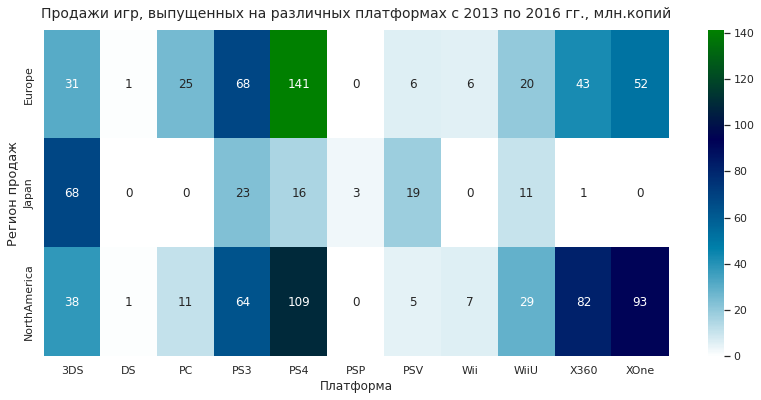

In [ ]:
# Построим тепловую карту распределения данных по продажам

plt.figure(figsize=(14,6))

h = sns.heatmap(data=t_plt, cmap='ocean_r', annot=True, fmt='1.0f')
h.set_title('Продажи игр, выпущенных на различных платформах с 2013 по 2016 гг., млн.копий',
            fontdict={'fontsize':14}, pad=12
)
h.set_xlabel('Платформа')
h.set_ylabel('Регион продаж', size=13)
plt.show()

Мы видим, что в целом рынок Северной Америки очень ёмкий и потребляет максимальное количество игр, выпущенных для различных платформ. В лидерах продаж в Северной Америке - игры для PS4, XOne и X360.

Интересная особенность европейского рынка - это популярность игр для платформ PS4/PS3. По этому показателю Европа превосходит Северную Америку.

На рынке Японии есть свой явный лидер - платформа 3DS (Nintendo 3DS), при том, что остальные платформы продаются в разы хуже, либо вообще имеют продажи, близкие к нулевым. Связано это, по всей видимости, с популярностью в Японии японской же компании Nintendo и её разработок (приставок и игровых консолей).

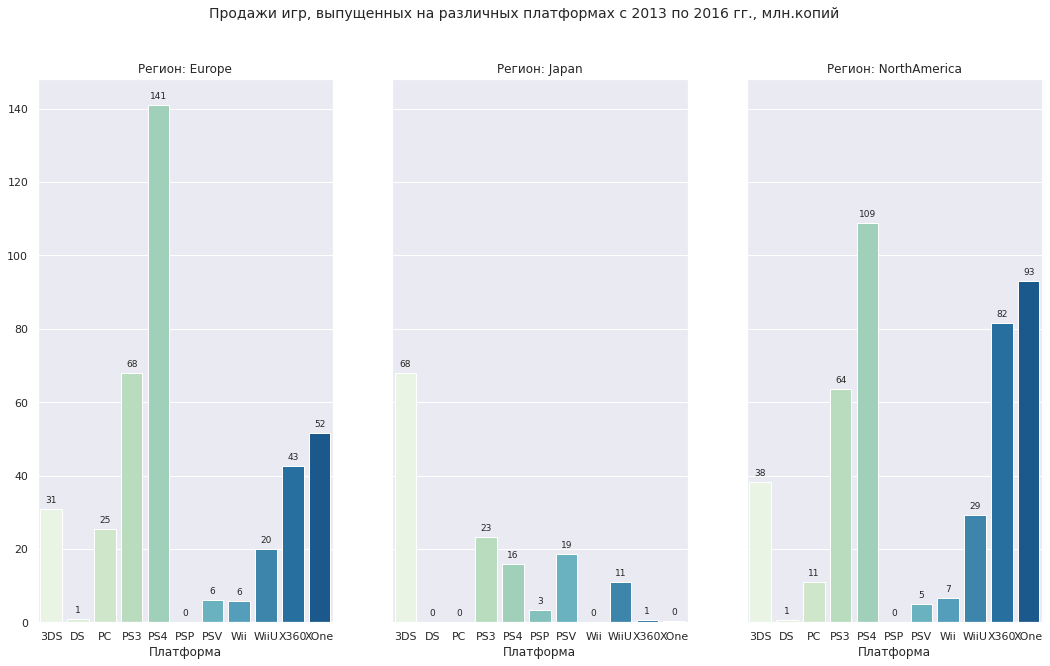

In [ ]:
# Построим отдельно для каждого региона столбиковые диаграммы

t_plt.reset_index(inplace=True)

f, ax = plt.subplots(1, len(regions), figsize=(18,10), sharey=True)
box_title = ''
i = 0

for a in ax:
    box_title = regions[i]

    bp = sns.barplot(data=t_plt.query('index == @box_title'), ax=a, palette='GnBu')
    
    for p in bp.patches:
        bp.annotate(format(round(p.get_height()), '.0f'), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha='center', va ='center', 
                   size=9,
                   xytext=(0,9), 
                   textcoords='offset points'
)    
    
    #a.set_ylabel('Продажа игр, млн.копий')
    a.set_xlabel('Платформа')
    a.set_title('Регион: ' + box_title)

    i+=1

plt.suptitle('Продажи игр, выпущенных на различных платформах с 2013 по 2016 гг., млн.копий', size=14)
plt.show()

Регион: Europe


platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: Europe, dtype: float64

Регион: Japan


platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: Japan, dtype: float64

Регион: NorthAmerica


platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: NorthAmerica, dtype: float64

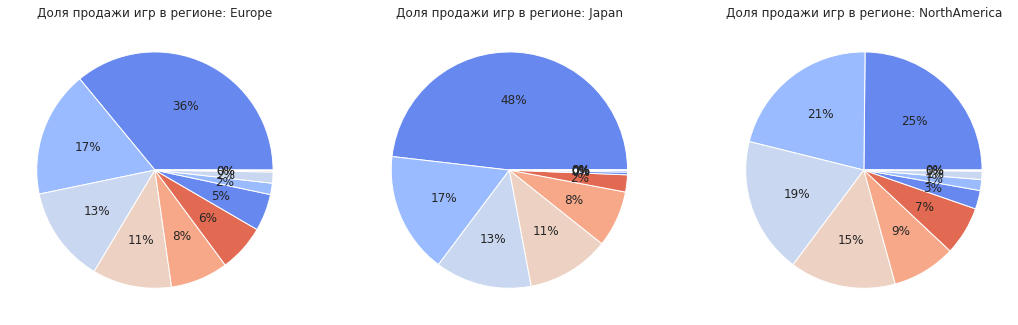

In [ ]:
# Выведем ТОП-5 платформ по регионам

i = 0
fig, ax = plt.subplots(1, 3, figsize=(18, 18))

for value in regions:

    print('Регион:', value)
    plt_list = pt_plt[value].sort_values(ascending=False)
    display(plt_list[:5])    
    ax[i].set(title='Доля продажи игр в регионе: ' + value)
    ax[i].pie(plt_list,
          colors=cp,
          autopct='%1.0f%%'
)
    i += 1


In [ ]:
# Посмотрим также на рейтинг платформ в других странах (other_sales)

pt_other1 = pd.pivot_table(data4, index='platform', values='other_sales', aggfunc=np.sum).sort_values(by='other_sales', ascending=False)

other_totals = data4['other_sales'].sum()
print(other_totals)
pt_other1['percentage'] = round((pt_other1['other_sales']/other_totals)*100,2)

display(pt_other1)

119.97


,other_sales,percentage
platform,,
PS4,48.35,40.30
PS3,26.77,22.31
XOne,14.27,11.89
X360,12.11,10.09
3DS,6.28,5.23
WiiU,4.69,3.91
PSV,3.26,2.72
PC,2.96,2.47
Wii,1.12,0.93


По своей структуре распределение продаж по платформам в других странах напоминает Европу (PS4/PS3/XOne/X360/3DS), но доля PS4 больше, чем в Европе и в Северной Америке.

In [ ]:
# - по жанрам

# Создадим сводную таблицу по жанрам с разными регионами продаж
pt_gen = pd.pivot_table(data4,
                        index='genre',
                        values=['na_sales', 'eu_sales', 'jp_sales'],
                        aggfunc=np.sum,
                        fill_value=0
)

display(pt_gen)
pt_gen.columns = regions
print('Итоги:', round(pt_gen['Europe'].sum(),3), round(pt_gen['Japan'].sum(),3), round(pt_gen['NorthAmerica'].sum(),3))

# Транспонируем матрицу с результатами по регионам
t_gen = pt_gen.T

display(t_gen)

,eu_sales,jp_sales,na_sales
genre,,,
Action,118.13,40.49,126.05
Adventure,8.25,5.82,7.14
Fighting,8.55,7.65,15.55
Misc,20.04,9.20,27.49
Platform,15.58,4.79,18.14
Puzzle,1.00,1.18,0.83
Racing,20.19,2.30,12.96
Role-Playing,36.97,51.04,46.40
Shooter,87.86,6.61,109.74


Итоги: 392.23 140.78 437.71


genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Europe,118.13,8.25,8.55,20.04,15.58,1.00,20.19,36.97,87.86,10.92,60.52,4.22
Japan,40.49,5.82,7.65,9.20,4.79,1.18,2.30,51.04,6.61,4.52,5.41,1.77
NorthAmerica,126.05,7.14,15.55,27.49,18.14,0.83,12.96,46.40,109.74,4.86,65.27,3.28


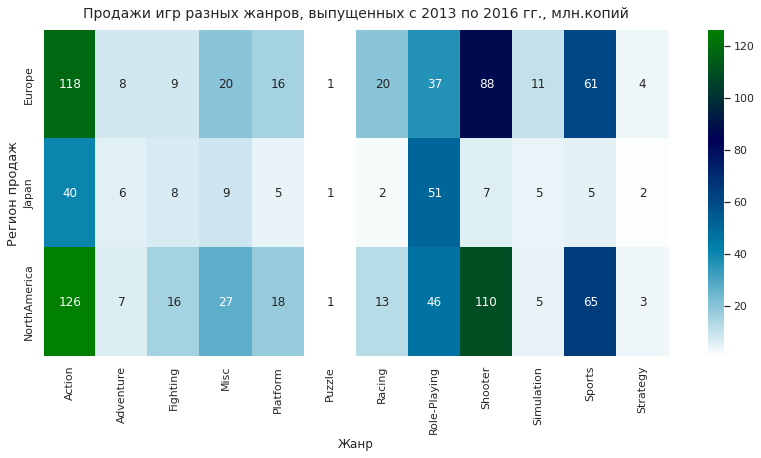

In [ ]:
# Построим тепловую карту распределения данных по продажам в разных жанрах

plt.figure(figsize=(14,6))

h = sns.heatmap(data=t_gen, cmap='ocean_r', annot=True, fmt='1.0f')
h.set_title('Продажи игр разных жанров, выпущенных с 2013 по 2016 гг., млн.копий',
            fontdict={'fontsize':14}, pad=12
)
h.set_xlabel('Жанр')
h.set_ylabel('Регион продаж', size=13)
plt.show()

Мы снова можем наблюдать максимальные значения показателей по региону "Северная Америка": там покупают больше всего игр жанров Action, Shooter и Sports.

В Европе популярны те же самые жанры, просто продажи идут в чуть меньшем объеме. Также Европа лидирует в жанре Racing - таких игр здесь покупают больше, чем  в других регионах.

Интересно, что Япония опять имеет свой "особый стиль" - в Японии лидируют по популярности РПГ-игры ("про покемонов"), и только на втором месте - игры жанра Action.

In [ ]:
# display(data4.query('genre == "Role-Playing"'))

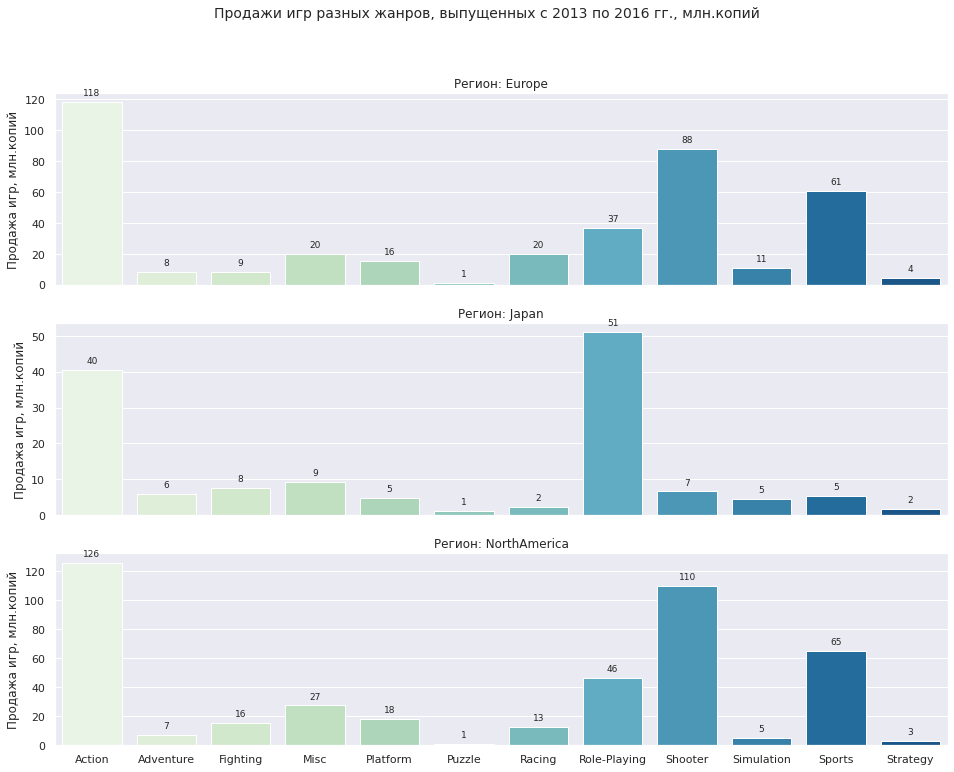

In [ ]:
# Построим отдельно для каждого региона столбиковые диаграммы

t_gen.reset_index(inplace=True)

f, ax = plt.subplots(len(regions), 1, figsize=(16,12), sharex=True)
box_title = ''
i = 0

for a in ax:
    box_title = regions[i]

    bp = sns.barplot(data=t_gen.query('index == @box_title'), ax=a, palette='GnBu')
    
    for p in bp.patches:
        bp.annotate(format(round(p.get_height()), '.0f'), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha='center', va ='center', 
                   size=9,
                   xytext=(0,9), 
                   textcoords='offset points'
)    
    
    a.set_ylabel('Продажа игр, млн.копий')
    a.set_xlabel('')
    a.set_title('Регион: ' + box_title)

    i+=1

plt.suptitle('Продажи игр разных жанров, выпущенных с 2013 по 2016 гг., млн.копий', size=14)
plt.show()

Регион: Europe


genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: Europe, dtype: float64

Регион: Japan


genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: Japan, dtype: float64

Регион: NorthAmerica


genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: NorthAmerica, dtype: float64

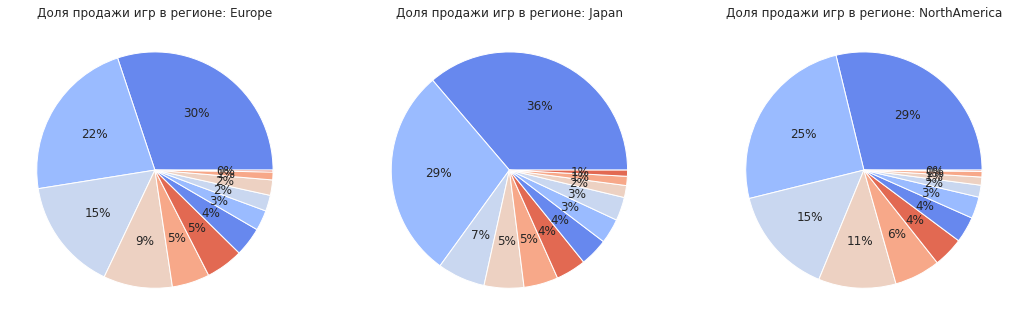

In [ ]:
# Выведем ТОП-5 жанров по регионам

i = 0
fig, ax = plt.subplots(1, 3, figsize=(18, 18))

for value in regions:

    print('Регион:', value)
    gen_list = pt_gen[value].sort_values(ascending=False)
    display(gen_list[:5])    
    ax[i].set(title='Доля продажи игр в регионе: ' + value)
    ax[i].pie(gen_list,
          colors=cp,
          autopct='%1.0f%%'
)
    i += 1


In [ ]:
# Посмотрим также на рейтинг жанров в других странах (other_sales)

pt_other2 = pd.pivot_table(data4, index='genre', values='other_sales', aggfunc=np.sum).sort_values(by='other_sales', ascending=False)

print(other_totals)
pt_other2['percentage'] = round((pt_other2['other_sales']/other_totals)*100,2)

display(pt_other2)

119.97


,other_sales,percentage
genre,,
Action,37.20,31.01
Shooter,28.77,23.98
Sports,19.45,16.21
Role-Playing,11.48,9.57
Misc,6.09,5.08
Racing,4.44,3.70
Platform,4.12,3.43
Fighting,3.56,2.97
Adventure,2.43,2.03


Распределение продаж по жанрам в других странах по структуре напоминает распределени в Северной Америке (Action и Shooter занимают 55% в объеме продаж).

In [ ]:
# Посмотрим, как влияет рейтинг ESRB на продажи

pt_esrb = pd.pivot_table(data4, index='rating', values=['eu_sales', 'jp_sales', 'na_sales'], aggfunc=np.sum)
pt_esrb.columns = regions
display(pt_esrb)
print('Итоги:', round(pt_esrb['Europe'].sum(),3), round(pt_esrb['Japan'].sum(),3), round(pt_esrb['NorthAmerica'].sum(),3))

t_esrb = pt_esrb.T

display(t_esrb)

,Europe,Japan,NorthAmerica
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
N/A,78.91,85.05,89.42
T,41.95,20.59,49.79


Итоги: 392.23 140.78 437.71


rating,E,E10+,M,N/A,T
Europe,83.36,42.69,145.32,78.91,41.95
Japan,15.14,5.89,14.11,85.05,20.59
NorthAmerica,79.05,54.24,165.21,89.42,49.79


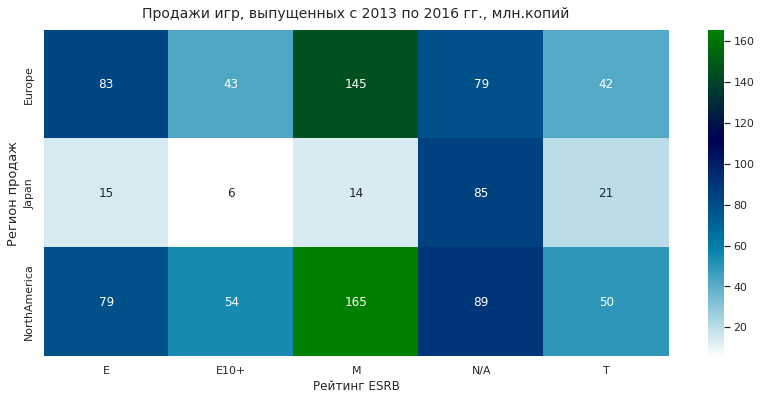

In [ ]:
plt.figure(figsize=(14,6))

h = sns.heatmap(data=t_esrb, cmap='ocean_r', annot=True, fmt='1.0f')
h.set_title('Продажи игр, выпущенных с 2013 по 2016 гг., млн.копий',
            fontdict={'fontsize':14}, pad=12
)
h.set_xlabel('Рейтинг ESRB')
h.set_ylabel('Регион продаж', size=13)
plt.show()

Мы видим, что в Северной Америке и Европе хорошо продаются игры с маркировкой "M" (для взрослой аудитории), в то время как в Японии они не очень популярны. Сказывается ранее выявленная закономерность - в Японии не очень популярные жанры Action и Shooter, которые и маркируются "для взрослых".

Если исключить из рассмотрения категорию N/A (рейтинг не определён), то самые востребованные в Японии игры маркируются как "T" (для тинейджеров).

In [ ]:
# Посмотрим, как распределяются суммарные продажи по регионам
ts = data4['total_sales'].sum()
print('Всего продаж за период 2013-2016 гг. -', round(ts,2), 'млн.копий')
print('Северная Америка -', round(data4['na_sales'].sum(),2), 'млн.копий', round((data4['na_sales'].sum()/ts)*100,2), '%')
print('Европа -', round(data4['eu_sales'].sum(),2), 'млн.копий', round((data4['eu_sales'].sum()/ts)*100,2), '%')
print('Япония -', round(data4['jp_sales'].sum(),2), 'млн.копий', round((data4['jp_sales'].sum()/ts)*100,2), '%')
print('Другие регионы -', round(data4['other_sales'].sum(),2), 'млн.копий', round((data4['other_sales'].sum()/ts)*100,2), '%')

Всего продаж за период 2013-2016 гг. - 1090.69 млн.копий
Северная Америка - 437.71 млн.копий 40.13 %
Европа - 392.23 млн.копий 35.96 %
Япония - 140.78 млн.копий 12.91 %
Другие регионы - 119.97 млн.копий 11.0 %


### Вывод ###

Если мы захотим составить портрет пользователя из **Северной Америки** (а это самый ёмкий региональный рынок компьютерных игр), то мы увидим, что он предпочитает игровые платформы (PlayStation и XBox):
1. PS4     - 25%
2. XOne    - 21%
3. X360    - 19%
4. PS3     - 15%
5. 3DS      - 9%

Кроме того, пользователь из Северной Америки предпочитает жанры:
1. Action          - 29%
2. Shooter         - 25%
3. Sports          - 15%
4. Role-Playing    - 11%
5. Misc             - 6% (прочие игры)

И в соответствии с жанровыми предпочтениями, в Северной Америке чаще всего приобретаются игры с рейтингом M («Mature») — «Для взрослых».

Пользователь из **Европы** предпочитает игровые платформы (те же PlayStation и XBox, но явное лидерство у PS):
1. PS4     - 36%
2. PS3     - 17%
3. XOne    - 13%
4. X360    - 11%
5. 3DS      - 8%

Пользователь из Европы приобретает игры следующих жанров:
1. Action          - 30%
2. Shooter         - 22%
3. Sports          - 15%
4. Role-Playing     - 9%
5. Racing           - 5%

Как мы видим, предпочтения те же, что и в Северной Америке, за исключением 5-го места в рейтинге - пользователь из Европы любит гонки.

И так же, как и в Северной Америке, в Европе чаще всего приобретаются игры с рейтингом M («Mature») — «Для взрослых».

Пользователь из **Японии** предпочитает игровые платформы (в первую очередь, Nintendo 3DS - почти 50% всех продаж):
1. 3DS     - 48%
2. PS3     - 17%
3. PSV     - 13%
4. PS4     - 11%
5. WiiU     - 8%

Жанр игры, который выбирает пользователь из Японии, тоже нестандартный - на первом месте RPG:
1. Role-Playing    - 36%
2. Action          - 29%
3. Misc             - 7%
4. Fighting         - 5%
5. Shooter          - 5%

Возможно, именно популярность игр для приставок Nintendo приводит к тому, что наиболее часто встречающийся в Японии рейтинг игр — "T" («Teen») — «Подросткам».

## Проверка гипотез ##

### Гипотеза о среднем рейтинге платформ Xbox One и PC

Сформулируем **нулевую гипотезу**: среднее значение пользовательского рейтинга для платформы XBox One равно среднему значению для платформы PC.

**Альтернативная гипотеза**: среднее значение рейтинга для платформы XBox One не равно среднему значению для платформы PC.

Проведем проверку гипотез по критерию Стьюдента (t-тест) для независимых выборок.


In [ ]:
# Возьмем выборку из нашего актуального датафрейма за 4 года (data4)

# Для XBox:

data_x = data4.query('platform == "XOne"').reset_index(drop=True)
display(data_x)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,0,0.0,N/A,7.39
1,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
2,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81,5.4,M,5.26
3,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84,6.4,T,4.49
4,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88,6.2,M,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
242,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63,8.2,E,0.01
243,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,0,6.6,E,0.01
244,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,0,0.0,N/A,0.01
245,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74,6.7,N/A,0.01


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


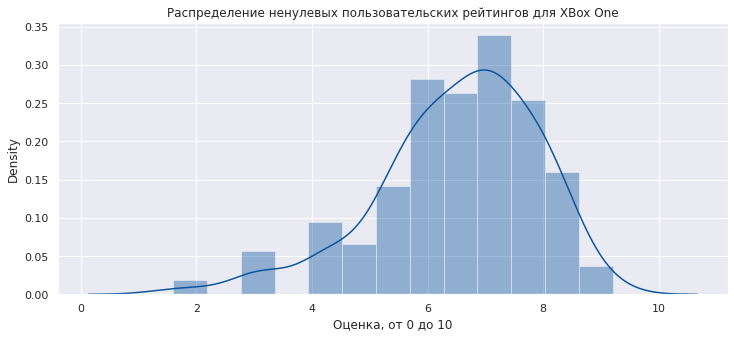

In [ ]:
# Построим график плотности распределения вероятности
# (уберем нулевые оценки, которые мы добавили на стадии предобработки)

sns.set(rc={"figure.figsize": (12, 5)}, palette='Blues_r')

ax = sns.distplot(data_x.query('user_score > 0')['user_score'])
ax.set_title('Распределение ненулевых пользовательских рейтингов для XBox One')
ax.set_xlabel('Оценка, от 0 до 10');

In [ ]:
# Распределение имеет форму колокола, достаточно симметричное, но немного смещено влево, область низких оценок
# с матожиданием 6.52 и медианой 6.8
print('Матожидание', round(data_x.query('user_score > 0')['user_score'].mean(),2))
print('Медиана', round(data_x.query('user_score > 0')['user_score'].median(),2))
print('Дисперсия:', round(np.var(data_x.query('user_score > 0')['user_score']), 2))
print('Стандартное отклонение:', round(np.std(data_x.query('user_score > 0')['user_score']), 2))

Матожидание 6.52
Медиана 6.8
Дисперсия: 1.9
Стандартное отклонение: 1.38


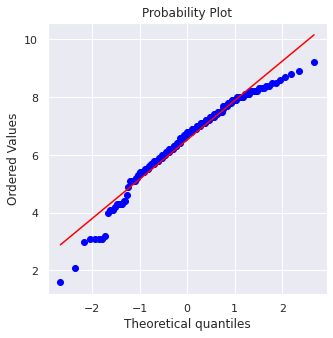

In [ ]:
# Для того чтобы применить критерий Стьюдента, мы должны убедиться, что распределение данных близко к нормальному

# Построим квантиль-квантильный график
# Он показывает, что распределение соответствует нормальному, с небольшими отклонениями

fig, ax = plt.subplots(figsize=(5,5))
st.probplot(data_x.query('user_score > 0')['user_score'], plot=ax);

In [ ]:
# Для ПК:

data_pc = data4.query('platform == "PC"').reset_index(drop=True)
display(data_pc)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70,3.9,T,3.05
1,StarCraft II: Heart of the Swarm,PC,2013,Strategy,0.83,0.66,0.0,0.18,86,7.9,T,1.67
2,SimCity (2013),PC,2013,Simulation,0.48,0.77,0.0,0.17,64,2.2,E10+,1.42
3,Battlefield 4,PC,2013,Shooter,0.39,0.87,0.0,0.10,81,6.0,M,1.36
4,Fallout 4,PC,2015,Role-Playing,0.51,0.67,0.0,0.10,84,5.4,M,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...
184,Ride 2,PC,2016,Racing,0.00,0.01,0.0,0.00,78,7.9,E,0.01
185,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.0,0.00,0,1.4,E,0.01
186,Codename: Panzers Complete Collection,PC,2016,Strategy,0.00,0.01,0.0,0.00,0,0.0,N/A,0.01
187,The Amazing Spider-Man 2 (2014),PC,2014,Action,0.00,0.01,0.0,0.00,0,0.0,N/A,0.01


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


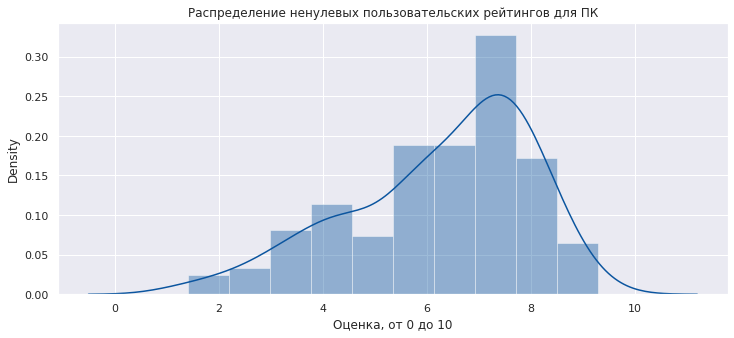

In [ ]:
# Построим график плотности распределения вероятности
# (уберем нулевые оценки, которые мы добавили на стадии предобработки)

ax = sns.distplot(data_pc.query('user_score > 0')['user_score'])
ax.set_title('Распределение ненулевых пользовательских рейтингов для ПК')
ax.set_xlabel('Оценка, от 0 до 10');

In [ ]:
# Распределение имеет форму колокола, но смещено влево, в область низких оценок
# с матожиданием 6.27 и медианой 6.8
print('Матожидание', round(data_pc.query('user_score > 0')['user_score'].mean(),2))
print('Медиана', round(data_pc.query('user_score > 0')['user_score'].median(),2))
print('Дисперсия:', round(np.var(data_pc.query('user_score > 0')['user_score']), 2))
print('Стандартное отклонение:', round(np.std(data_pc.query('user_score > 0')['user_score']), 2))

Матожидание 6.27
Медиана 6.8
Дисперсия: 3.02
Стандартное отклонение: 1.74


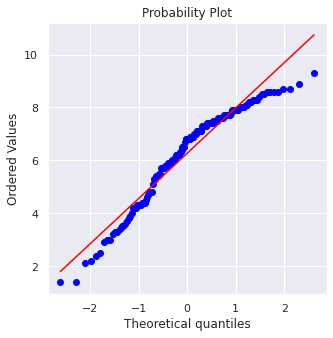

In [ ]:
# Построим квантиль-квантильный график
# Распределение соответствует нормальному, с небольшими отклонениями

fig, ax = plt.subplots(figsize=(5,5))
st.probplot(data_pc.query('user_score > 0')['user_score'], plot=ax);

In [ ]:
# Зададим уровень значимости для проверки гипотез - 5%
alpha = 0.05

# Проведем двусторонний t-тест в предположении о неравенстве дисперсий (t-тест в модификации Уэлча)
results = st.ttest_ind(data_x.query('user_score > 0')['user_score'],
                       data_pc.query('user_score > 0')['user_score'],
                       equal_var=False
)

print(results.pvalue)

0.14759594013430463


In [ ]:
# Полученное p-значение больше уровня статистической значимости
# у нас недостаточно оснований, чтобы отвергнуть нулевую гипотезу
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


### Вывод

Мы принимаем гипотезу о равенстве средних пользовательских оценок для платформ XBox One и PC.

### Гипотеза о среднем рейтинге жанров Action и Sports 

Сформулируем **нулевую гипотезу**: среднее значение пользовательского рейтинга жанра Action равно среднему значению жанра Sports.

**Альтернативная гипотеза**: среднее значение рейтинга жанра Action не равно среднему значению жанра Sports.

(по заданию нас интересует "альтернативная гипотеза" - о неравенстве средних)

Проведем проверку гипотез по критерию Стьюдента (t-тест) для независимых выборок.

In [ ]:
# Возьмем выборку из нашего актуального датафрейма за 4 года (data4)

# Для жанра Action:

data_act = data4.query('genre == "Action"').reset_index(drop=True)
display(data_act)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
3,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95,9.1,M,5.86
4,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
...,...,...,...,...,...,...,...,...,...,...,...,...
761,Kyoukai no Shirayuki,PSV,2016,Action,0.00,0.00,0.01,0.00,0,0.0,N/A,0.01
762,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,N/A,0.01
763,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80,7.6,M,0.01
764,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,0,0.0,N/A,0.01


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


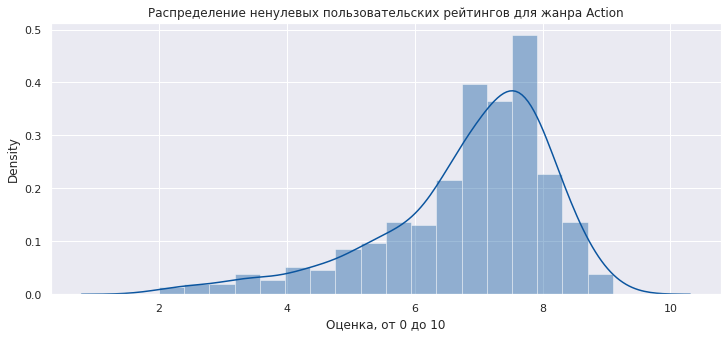

In [ ]:
# Построим график плотности распределения вероятности
# (уберем нулевые оценки, которые мы добавили на стадии предобработки)

ax = sns.distplot(data_act.query('user_score > 0')['user_score'])
ax.set_title('Распределение ненулевых пользовательских рейтингов для жанра Action')
ax.set_xlabel('Оценка, от 0 до 10');

In [ ]:
# Распределение имеет форму колокола, немного смещено влево
# с матожиданием 6.84 и медианой 7.1
# Жанр Action очень популярен, и оценки пользователей достаточно высоки
print('Матожидание', round(data_act.query('user_score > 0')['user_score'].mean(),2))
print('Медиана', round(data_act.query('user_score > 0')['user_score'].median(),2))
print('Дисперсия:', round(np.var(data_act.query('user_score > 0')['user_score']), 2))
print('Стандартное отклонение:', round(np.std(data_act.query('user_score > 0')['user_score']), 2))

Матожидание 6.84
Медиана 7.1
Дисперсия: 1.76
Стандартное отклонение: 1.33


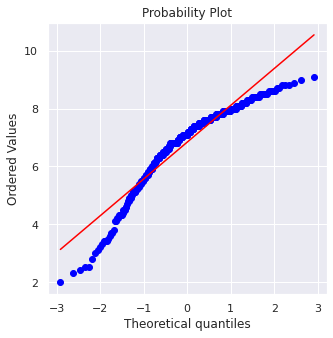

In [ ]:
# Построим квантиль-квантильный график
# Он показывает, что распределение соответствует нормальному, с небольшими отклонениями

fig, ax = plt.subplots(figsize=(5,5))
st.probplot(data_act.query('user_score > 0')['user_score'], plot=ax);

In [ ]:
# Для жанра Sports:

data_spt = data4.query('genre == "Sports"').reset_index(drop=True)
display(data_spt)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
1,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
2,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86,4.3,E,6.46
3,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82,5.7,E,6.08
4,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,0,4.5,E,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...
209,R.B.I. Baseball 2016,PS4,2016,Sports,0.01,0.00,0.00,0.00,0,0.0,N/A,0.01
210,Turbo: Super Stunt Squad,X360,2013,Sports,0.00,0.01,0.00,0.00,0,4.5,E,0.01
211,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.00,0.00,0,1.4,E,0.01
212,Tour de France 2014,PS3,2014,Sports,0.00,0.01,0.00,0.00,0,0.0,E,0.01


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


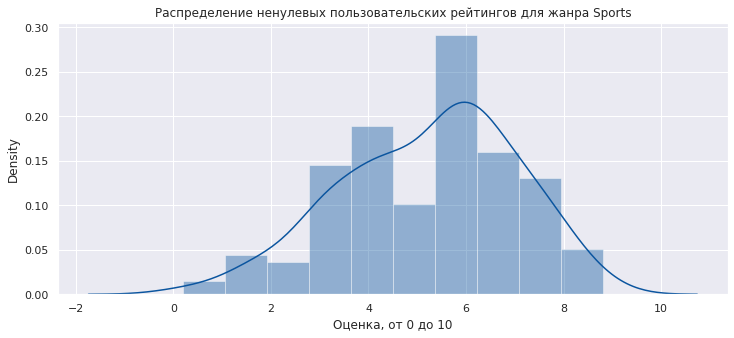

In [ ]:
# Построим график плотности распределения вероятности
# (уберем нулевые оценки, которые мы добавили на стадии предобработки)

ax = sns.distplot(data_spt.query('user_score > 0')['user_score'])
ax.set_title('Распределение ненулевых пользовательских рейтингов для жанра Sports')
ax.set_xlabel('Оценка, от 0 до 10');

In [ ]:
# Распределение имеет форму колокола, достаточно симметричен
# с матожиданием 5.24 и медианой 5.5
# Жанр Sports менее популярен, чем Action
print('Матожидание', round(data_spt.query('user_score > 0')['user_score'].mean(),2))
print('Медиана', round(data_spt.query('user_score > 0')['user_score'].median(),2))
print('Дисперсия:', round(np.var(data_spt.query('user_score > 0')['user_score']), 2))
print('Стандартное отклонение:', round(np.std(data_spt.query('user_score > 0')['user_score']), 2))

Матожидание 5.24
Медиана 5.5
Дисперсия: 3.16
Стандартное отклонение: 1.78


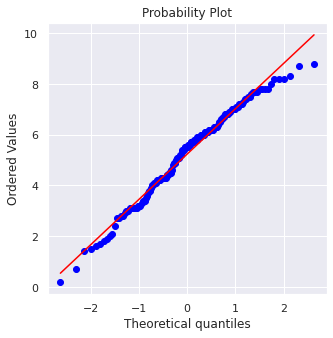

In [ ]:
# Построим квантиль-квантильный график
# Он показывает, что распределение соответствует нормальному

fig, ax = plt.subplots(figsize=(5,5))
st.probplot(data_spt.query('user_score > 0')['user_score'], plot=ax);

In [ ]:
# Зададим уровень значимости для проверки гипотез - 5%
alpha = 0.05

# Проведем двусторонний t-тест в предположении о неравенстве дисперсий
results = st.ttest_ind(data_act.query('user_score > 0')['user_score'],
                       data_spt.query('user_score > 0')['user_score'],
                       equal_var=False
)

print(results.pvalue)

1.4460039700704315e-20


In [ ]:
# Вероятность ошибки при отклонении нулевой гипотезы меньше уровня статистической значимости
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


### Вывод ###

В соответствии с уровнем значимости 0.05 отвергаем нулевую гипотезу. Средняя пользовательская оценка игр жанра Action и жанра Sports статистически значимо различаются.
Следовательно, мы принимаем альтернативную гипотезу (о том, что средние оценки не равны).

## Общий вывод ##

Мы проанализировали статистику продаж за наиболее показательный период (последние 4 года, с 2013 по 2016 гг.) и сделали вывод, что для включения в план продаж интернет-магазина на 2017 год наиболее перспективными кажутся игры для платформ:
- PlayStation 4
- XBox One
- Nintendo 3DS

Кроме того, свою стабильную, хоть и небольшую долю рынка имеют игры для ПК (по крайней мере, в Европе).

Нам необходимо также понимать, продажи в каких регионах нас интересуют, потому что некоторые регионы - такие, как Япония - имеют свою специфику.

Перспективным был бы выход на рынок Северной Америки, поскольку Северная Америка занимает 40% в мировом объеме потребления (по результатам сбора статистики за 4 года), а Северная Америка и Европа вместе охватывают 76% рынка компьютерных игр.

С точки зрения жанров, явные лидеры - это игры жанра Action, Shooting и Sports, но если посмотреть на Японию, то лидером будет жанр RPG (в Европе и Северной Америке он удерживает стабильные 9-10% в объеме продаж). Для европейского пользователя будет также интересен жанр Racing.

В то же время, можно посмотреть на список аутсайдеров в общем объеме продаж за последние 4 года - это жанры Adventure, Simulation, Strategy и Puzzle. По всей видимости, предложение интернет-магазина по таким позциям можно сократить.

В целом, мы видим, что пользователи из Европы и Северной Америки охотно покупают динамичные и достаточно реалистичные игры с маркировкой M («Mature») — «Для взрослых», но игры с маркировкой E («Everyone») — «Для всех» тоже популярны.

Что касается такого аспекта, как наличие у игры оценки пользователей и/или критиков: наше исследование выявило очень слабую корреляцию между оценками и объемами продаж, следовательно при построении плана продаж эти факторы можно не принимать во внимание.